<a href="https://colab.research.google.com/github/Salciano/Python/blob/main/Showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a showcase, displaying skills I learned in Python and its libraries, within the context of Deep Learning & Data Science.
It also serves as educational material for other projects.

#Deep Learning

---

<details>

<summary>Deep Learning & Gradient Descent</summary>

---
Deep learning models learn mainly by using the gradient descent algoritm.
Here is how:
1. GUESS where the minimum error point might be, within an error function.
2. (Re)Compute the error's derivative, pointing for where there should be less error.
3. Learn from error and repeat previous steps from the new point.
</details>
---
<details>
<summary>Concepts</summary>

---
Perceptron

The perceptron is the precursor of deep learning networks, a model with multiple inputs.

The perceptron turns inputs into an output, through a mathematical operation.

This could be simple mathematical operations, like adding or subtracting, dot product and so on...

It may look like basic, but we can do useful things with this.

For example, I could devise a movie recommendation algorithm based on this.

If you would like to see that algorithm, jump to the "Praxis" section and see for yourself :)

---
Activation Function

Activation functions are functions that determine whether an "artificial neuron" "fires" or "activates" to pass a signal to the next layer, a process inspired by biological neurons.

---
Vanishing Gradient

A vanishing gradient is when the gradient descent algorithm encounters flat or near-flat regions of a function - slowing or halting it -, preventing it from reaching its goal (minimum).

In flat regions, the derivative zeroes out, which may cause an unprepared algorithm to zero out as well, halting advancement.

In near-flat regions, the derivative may not zero out. However, the derivative is so small that the algorithm progresses very little while in the region.

Once it runs out of training epochs, it finishing precousciously, likely in the near-flat region, before reaching its goal (minimum).

---
Exploding Gradient

An exploding gradient is when the gradient descent algorithm encounters steep regions of a function, causing it to skip onto another wave or cycle with another minimum.

---
Solutions for Vanishing- or Exploding Gradients
* Restarting the algo in a different location.
* Preparing the algo for flat regions.
Examples:
1. If previous/next fuction/derivative step = 0 or = itself, advance (with a different/previous learnrate, etc).
2. If previous/next fuction/derivative step = 0 or = itself, restart in a different position.
* Prepare the algo for steep regions.
Examples:
1. If derivative sign changes, undo last step and proceed with a smaller steps, effectively retracing and advancing cautionsly.
2. If derivative sign changes, add instead of subtract, effectively changing direction. Efficient on the same wave. May cause issues with multiple waves.
* Use models with few hidden layers.
* Select activation functions that don't saturate (ReLU).
* Apply weight normalization.
* Regularization techniques, like batch normalization, dropout, weight decay...
* Deploy architectures like residual networks (resnet).

</details>


Computed minimum error is (y): [3.25]
Computed minimum located at (x): [0.50000209]


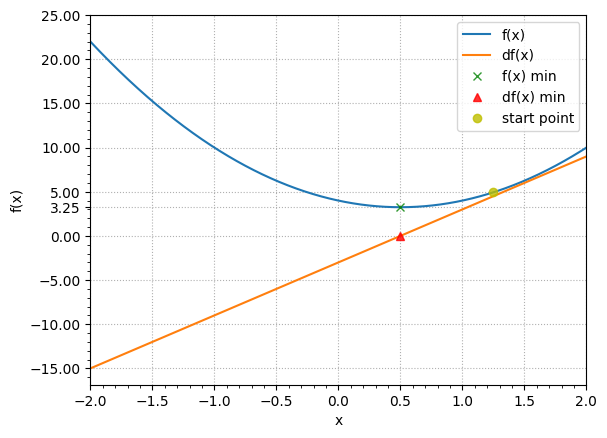


Starting Location (x): [1.24590462]
Starting Error (y): [4.91912112]
Starting Derivative (x): [4.47542774]

Ending Location (x): 0.50000
Ending Error (y): 3.25000
Ending Derivative (x): 0.00001

Here is the learning curve:


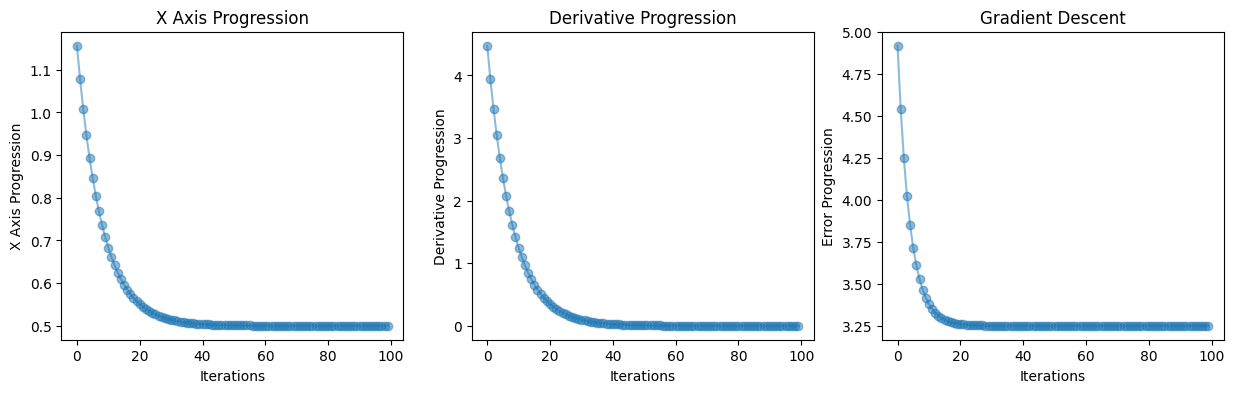

In [ ]:
#@title Gradient Descent 1I
#1-Input

import numpy
import matplotlib.pyplot as ploti
#import sympy

def fx(x): # Error function python function
  return 3*x**2 - 3*x + 4

def dfx(x): # Derivative of error function python function
#  return sympy.diff(fx(x), x)
#  return sympy.diff(3*x**2 - 3*x + 4, x)
  return 6*x - 3 # manual calculation of derivative of f(x)

# Initialize x
x = numpy.linspace(-2,2,1000) # 1000 points, linearly separated between -2 to 2

#localmin = numpy.random.choice(x,1) # choose 1 value from x
localmin = numpy.random.rand(1)*4-2 # 1 random number between -2 to 2

init_min, init_error, init_deriv = localmin, fx(localmin), dfx(localmin) # store initial variables before they update

# Learning parameters
learn_rate = .02 # Increase this to "speed up", by scaling less. Lower it once your get close?
train_epochs = 100 # Increase this to improve results, by increasing iterations, but taking up computation power

# iteration
modelparams = numpy.zeros((train_epochs, 3))
for idx_gradi in range(train_epochs): # as many steps/iterations as stated on training_epochs
  modelparams[idx_gradi,2] = fx(localmin)[0] # error
  gradi = dfx(localmin) # gradi = 6*localmin-3
  localmin = localmin - learn_rate * gradi
#  modelparams[idx_gradi,:] = localmin[0], gradi[0], fx(localmin)[0]
  modelparams[idx_gradi,0] = localmin[0]
  modelparams[idx_gradi,1] = gradi[0]
#  print("Iteration:", idx_gradi) # debug
#  print("Scale:", gradi) # debug
#  print("Local Min:", localmin) # debug
print("\nComputed minimum error is (y):", fx(localmin))
print("Computed minimum located at (x):", localmin)
#print(modelparams) # debug

tiky = numpy.linspace(-15,25,9)
tiky = numpy.append(tiky, fx(localmin))

# Result Graph
ploti.plot(x,fx(x), x, dfx(x))
ploti.plot(localmin, fx(localmin), "gx", alpha=0.8)
ploti.plot(localmin, dfx(localmin), "r^", alpha=0.8)
ploti.plot(init_min, fx(init_min), "yo", alpha=0.8)
ploti.plot(localmin, fx(localmin))
ploti.xlim(x[[0, -1]])
ploti.grid(linestyle=":")
ploti.minorticks_on()
ploti.yticks(tiky)
ploti.xlabel("x")
ploti.ylabel("f(x)")
ploti.legend(["f(x)", "df(x)", "f(x) min", "df(x) min", "start point"])
ploti.show()

print(f"\nStarting Location (x): {init_min}")
print(f"Starting Error (y): {init_error}")
print(f"Starting Derivative (x): {init_deriv}")

print(f"\nEnding Location (x): {localmin[0]:.5f}")
print(f"Ending Error (y): {fx(localmin)[0]:.5f}")
print(f"Ending Derivative (x): {dfx(localmin)[0]:.5f}")

print("\nHere is the learning curve:")
fig,ax = ploti.subplots(1,3,figsize=(15,4))

for i in range(3):
  ax[i].plot(modelparams[:,i], "o-", alpha=0.5)
  ax[i].set_xlabel("Iterations")

ax[0].set_title(f"X Axis Progression")
ax[1].set_title(f"Derivative Progression")
ax[2].set_title(f"Gradient Descent")
ax[0].set_ylabel("X Axis Progression")
ax[1].set_ylabel("Derivative Progression") # Should approach zero
ax[2].set_ylabel("Error Progression") # Should approach minimum error
ploti.show()


Starting point: [ 1.311 -0.799]
Ending point: [ 0.228 -1.626]


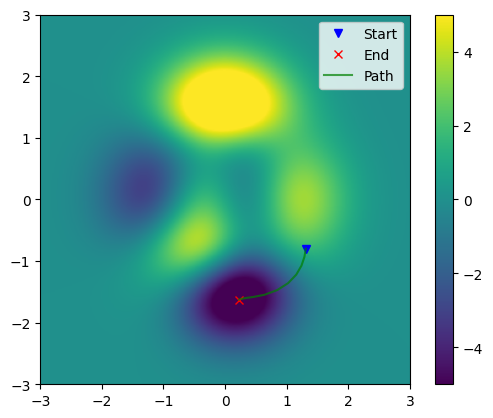

In [ ]:
#@title Gradient Descent 2I
#2-Input

import sympy
import numpy
import matplotlib.pyplot as ploti
#import matplotlib_inline.backend_inline # svg for better res
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

 # peaks math function from matlab
def funky1(x, y):
  x, y = numpy.meshgrid(x, y)
  z = 3 * (1-x)** 2 * numpy.exp(-(x**2) - (y+1)**2) \
  - 10*(x/5 - x**3 - y**5) * numpy.exp(-x**2-y**2) \
  - 1/3*numpy.exp(-(x+1)**2 - y**2)
  return z
# \ is a line continuation character

# create landscape
x = numpy.linspace(-3, 3, 301)
y = numpy.linspace(-3, 3, 301)
num_z = funky1(x, y)

# create sympy x and y input vars: x, y
sym_x, sym_y = sympy.symbols("sym_x, sym_y")

# create sympy output function of x and y: z = f(x,y)
sym_z = 3 * (1-sym_x)** 2 * sympy.exp(-(sym_x**2) - (sym_y+1)**2) \
- 10*(sym_x/5 - sym_x**3 - sym_y**5) * sympy.exp(-sym_x**2-sym_y**2) \
- 1/3*sympy.exp(-(sym_x+1)**2 - sym_y**2)

# 1. sympy.diff() computes function derivatives
# 2. sympy.lambdify() turns deriv_x/deriv_y into python functions
# 3. these lambdified functions are numpy-callable, later
deriv_x = sympy.lambdify( (sym_x, sym_y), sympy.diff(sym_z, sym_x), "sympy" )
deriv_y = sympy.lambdify( (sym_x, sym_y), sympy.diff(sym_z, sym_y), "sympy" )

# Calculating a derivative using sympy.diff() results in a symbolic expression.
# .evalf() turns the symbolic result at 1,1 into a numeric floating-point result
#deriv_x(1,1).evalf() # partial derivative of sym_x at 1,1
#print(f"{deriv_x(1,1):.5f}")

# random startpoint from -2 to 2
init_point = numpy.random.rand(2)*4-2
#proxy_min = init_point[:] # test this
proxy_min = init_point

# learn parameters
learn_rate = .03
learn_epoch = 200

path = numpy.zeros((learn_epoch, 2)) # dimensions: learn_epoch x 2 (2 is for 2 inputs)

for i in range(learn_epoch):
  path[i,:] = proxy_min
#  gradi = numpy.array( [deriv_x(proxy_min[0], proxy_min[1]),
#                        deriv_y(proxy_min[0], proxy_min[1]) ])
  gradi = numpy.array( [deriv_x(proxy_min[0], proxy_min[1]).evalf(),
                        deriv_y(proxy_min[0], proxy_min[1]).evalf() ])
  proxy_min = proxy_min - gradi * learn_rate

numpy.set_printoptions(precision=3) # globally truncate floats
print("Starting point:", init_point)
print("Ending point:", proxy_min.astype(float)) # was not applying here

#graph
ploti.imshow(num_z, extent= [x[0], x[-1], y[0], y[-1] ], vmin= -5, vmax= 5, origin="lower")
ploti.plot(init_point[0], init_point[1], "bv")
ploti.plot(proxy_min[0], proxy_min[1], "rx")
ploti.plot(path[:,0], path[:,1], "g", alpha=0.7)
ploti.legend(["Start", "End", "Path"])
ploti.colorbar()
ploti.show()

# graph parameter explanation:
# extent = [ [][] [][] ] are the graph's boundaries, which are being fetched from vars x and y at their first [0] and last [-1] index
# vmin: This sets the minimum data value that will be mapped to the lowest color in the colormap. Any data values less than vmin will be mapped to the same lowest color.
# vmax: This sets the maximum data value that will be mapped to the highest color in the colormap. Any data values greater than vmax will be mapped to the same highest color.


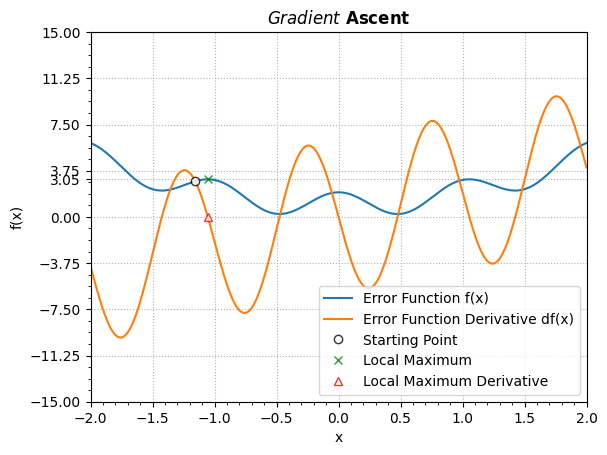


Starting Location (x): [-1.15529323]
Starting Error (y): [2.89526104]
Starting Derivative (x): [2.89261207]

Ending Location (x): -1.05448
Ending Error (y): 3.05391
Ending Derivative (x): 0.00000


In [ ]:
#@title Gradient Ascent
# This is just to show that it is also possible to find maxima

import numpy
import matplotlib.pyplot as ploti

def fx(x): # Error function python function
  return 1 + ( numpy.cos(2*numpy.pi*x) + x**2 )

# Derivative of error function python function
def dfx(x):
  return 2*x - 2*numpy.pi * numpy.sin(2*numpy.pi*x )

# Initialize x
x = numpy.linspace(-2,2,500) # 500 points, linearly spaced between min -2, max 2
xdraw = numpy.linspace(-3,3,500) # 500 points, linearly spaced between min -3, max 3

localmax = numpy.random.rand(1)*2.8 - 1.4 # 1 random number between -1.4 to 1.4
# simpler less thinking way, but more processing
#localmax = 5
#while localmax < -1.4 or localmax > 1.4: # simple way not to outbound graph
#  localmax = numpy.random.choice(x,1)


init_max, init_error, init_deriv = localmax, fx(localmax), dfx(localmax) # store initial variables before they update

# Learning parameters
learn_rate = .02
train_epochs = 100

# iteration
modelparams = numpy.zeros((train_epochs, 3))
for i in range(train_epochs):
  modelparams[i,2] = fx(localmax)[0] # error
  gradient = dfx(localmax)
  localmax = localmax + learn_rate * gradient
  modelparams[i,:] = localmax[0], gradient[0], fx(localmax)[0]

# Result Graph
ploti.rc("lines", markerfacecolor="w")
ploti.plot(x,fx(x), x, dfx(x))
#ploti.plot(x, fx(x), color="royalblue")
#ploti.plot(x, dfx(x), color="orange")
ploti.plot(init_max, fx(init_max), "ko", alpha=0.8) # start
ploti.plot(localmax, fx(localmax), "gx", alpha=0.8)
ploti.plot(localmax, dfx(localmax), "r^", alpha=0.8) #
ploti.plot(localmax, fx(localmax))
ploti.xlim(x[[0, -1]])
ploti.grid(linestyle=":")
ploti.minorticks_on()
tiky = numpy.linspace(-15,15,9)
tiky = numpy.append(tiky, fx(localmax))
ploti.yticks(tiky)
ploti.xlabel("x")
ploti.ylabel("f(x)")
ploti.legend(["Error Function f(x)", "Error Function Derivative df(x)", "Starting Point", "Local Maximum", "Local Maximum Derivative"])
ploti.title("$Gradient$ Ascent", fontweight="bold")
ploti.show()

print(f"\nStarting Location (x): {init_max}")
print(f"Starting Error (y): {init_error}")
print(f"Starting Derivative (x): {init_deriv}")

print(f"\nEnding Location (x): {localmax[0]:.5f}")
print(f"Ending Error (y): {fx(localmax)[0]:.5f}")
print(f"Ending Derivative (x): {dfx(localmax)[0]:.5f}")


Here we will be test a static learning rate vs multiple dynamic learnrates and compare them to see which performed better.
To ensure no learning rate benefited from a more favorable starting location, with less error, we assigned the same start to each method.


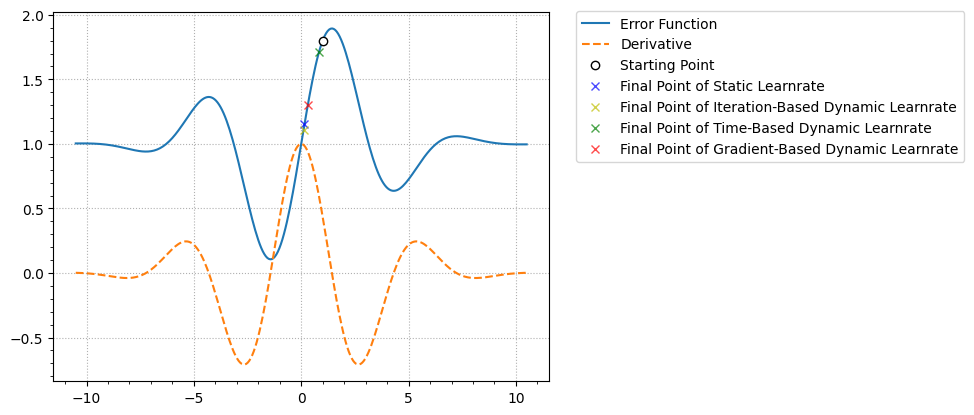

Starting Point: 1
Starting Error: 1.8004319606128645
Final Static-Based Error: 0.15127419660566854
Final Iteration-Based Error: 0.10612470955215791
Final Time-Based Error: 0.8322425111817446
Final Gradient-Based Error: 0.3042968107971682

It seems that the iteration-based dynamic learnrate performed best.
However, to rule out that the starting location did not favor one method over another, let's test use the parametric-experimental approach and systematically each learnrate throughtout varied starting locations.

Now, let's visualize the distribution of the resulting error, for each gradient descent algorithm runing on different locations:


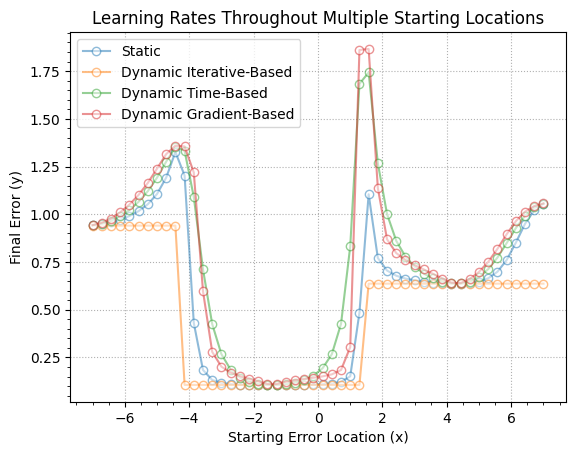


Again, it seems that the iterative-based dynamic algorithm performed the best, from a visual observation.
However, sometimes, it can be difficult to ascertain results visually, like when there is convoluted data.
In such cases, the t-test can be performed to compare if there is a statistically-relevant difference.
Also, caution should be used, as these results were only tested for this dataset. Different data could require completely different parameters and optimization.


In [ ]:
#@title Dynamic Gradient Descent
# Learnrate > NumPy. Matplotlib

import numpy
import matplotlib.pyplot as ploti

# Part 1
print("Here we will be test a static learning rate vs multiple dynamic learnrates and compare them to see which performed better.")
print("To ensure no learning rate benefited from a more favorable starting location, with less error, we assigned the same start to each method.")

# Input. Function. Derivative
in1 = numpy.linspace(-7*1.5, 7*1.5, 300)
def fin1(in1):
  return 1 + ( numpy.sin(in1) * numpy.exp(-in1**2*0.05) )
def defin1(in1):
  return numpy.cos(in1) * numpy.exp(-in1**2*0.05) + numpy.sin(in1) * (-0.1*in1) * numpy.exp(-in1**2*0.05)

# initializing parameters
proxy_min = init_point = 1 #init_point = numpy.array([1]) # fixed start location
learn_rate = numpy.full((4,), 0.01) #learn_rate = numpy.linspace(0.01, 0.01, 4)
train_sess = 300
final_error = numpy.zeros(len(learn_rate))

# gradi algo
for idx_learn_rate in range(len(learn_rate)):
  proxy_min = init_point # reset on each iteration

  for idx_gradi in range(train_sess):
    gradi = defin1(proxy_min)
    if idx_learn_rate == 0: # static learnrate
      learn_rate[idx_learn_rate] = learn_rate[0] # also above
    elif idx_learn_rate == 1: # iteration-based learnrate
      #learn_rate[idx_learn_rate] = learn_rate[0] * ((train_sess - idx_gradi) * 0.1)
      learn_rate[idx_learn_rate] = learn_rate[0] * ((train_sess - idx_gradi))
      #print(f"learnrate {idx_learn_rate}/{idx_gradi}: {learn_rate[idx_learn_rate]}")
    elif idx_learn_rate == 2: # time-based learnrate
      #learn_rate[idx_learn_rate] = learn_rate[0] * ((train_sess - idx_gradi) * 0.1)
      learn_rate[idx_learn_rate] = learn_rate[0] * (1- (idx_gradi+1)/train_sess )
      #print(f"learnrate {idx_learn_rate}/{idx_gradi}: {learn_rate[idx_learn_rate]}")
    elif idx_learn_rate == 3: # gradient-based learnrate
      learn_rate[idx_learn_rate] = learn_rate[0] * numpy.abs(gradi)
      #print(f"learnrate {idx_learn_rate}/{idx_gradi}: {learn_rate[idx_learn_rate]}")
    proxy_min = proxy_min - gradi * learn_rate[idx_learn_rate]
  final_error[idx_learn_rate, ] = fin1(proxy_min)

# Graph
ploti.rc("lines", marker="o", markerfacecolor="w")
ploti.plot(in1, fin1(in1), "-", label="Error Function")
ploti.plot(in1, defin1(in1), "--", label="Derivative")
ploti.plot(init_point, fin1(init_point), "ko", label="Starting Point")
ploti.plot(final_error[0], fin1(final_error[0]), "bx", label="Final Point of Static Learnrate", alpha=.7)
ploti.plot(final_error[1], fin1(final_error[1]), "yx", label="Final Point of Iteration-Based Dynamic Learnrate", alpha=.7)
ploti.plot(final_error[2], fin1(final_error[2]), "gx", label="Final Point of Time-Based Dynamic Learnrate", alpha=.7)
ploti.plot(final_error[3], fin1(final_error[3]), "rx", label="Final Point of Gradient-Based Dynamic Learnrate", alpha=.7)
ploti.grid(linestyle=":")
ploti.minorticks_on()
ploti.legend(bbox_to_anchor=(1.04, 1.02), loc="upper left")
ploti.show()

print("Starting Point:", init_point)
print("Starting Error:", fin1(init_point))
print("Final Static-Based Error:", final_error[0])
print("Final Iteration-Based Error:", final_error[1])
print("Final Time-Based Error:", final_error[2])
print("Final Gradient-Based Error:", final_error[3])

print("\nIt seems that the iteration-based dynamic learnrate performed best.")

# Part 2
print("However, to rule out that the starting location did not favor one method over another, let's test use the parametric-experimental approach and systematically each learnrate throughtout varied starting locations.")

start_locs = numpy.linspace(-7,7,50) # systematically varied starting locations
final_error = numpy.ones((len(start_locs), len(learn_rate))) # initialize vector filled with 0s with the same lenght/dimensions

for idx1_start, proxy_min in enumerate(start_locs): # run the gradient descent as many times as in start_locs (50)
  for idx_learn_rate in range(len(learn_rate)):
    proxy_min = start_locs[idx1_start] # Reset proxy_min for each learning rate experiment
    for idx_gradi in range(train_sess): # the gradient descent algo:
      gradi = defin1(proxy_min)
      if idx_learn_rate == 0: # static learnrate:
        learn_rate[idx_learn_rate] = learn_rate[0] # also above
      elif idx_learn_rate == 1: # iteration-based learnrate:
        learn_rate[idx_learn_rate] = learn_rate[0] * ((train_sess - idx_gradi))
      elif idx_learn_rate == 2: # time-based learnrate:
        learn_rate[idx_learn_rate] = learn_rate[0] * (1 - (idx_gradi+1)/train_sess )
      elif idx_learn_rate == 3: # gradient-based learnrate:
        learn_rate[idx_learn_rate] = learn_rate[0] * numpy.abs(gradi)
      proxy_min = proxy_min - learn_rate[idx_learn_rate] * gradi
    final_error[idx1_start, idx_learn_rate] = fin1(proxy_min) # store each final error, after running each iteration of the gradient descent algo on each starting location

#print("0", final_error[:,0], "\n1", final_error[:,1], "\n2", final_error[:,2], "\n3", final_error[:,3]) # debug

# Graph
print("\nNow, let's visualize the distribution of the resulting error, for each gradient descent algorithm runing on different locations:")

ploti.rc("lines", marker="o", markerfacecolor="w")
ploti.plot(start_locs, final_error[:,0], alpha=0.5, label="Static")
ploti.plot(start_locs, final_error[:,1], alpha=0.5, label="Dynamic Iterative-Based")
ploti.plot(start_locs, final_error[:,2], alpha=0.5, label="Dynamic Time-Based")
ploti.plot(start_locs, final_error[:,3], alpha=0.5, label="Dynamic Gradient-Based")

ploti.xlabel("Starting Error Location (x)")
ploti.ylabel("Final Error (y)")
ploti.grid(linestyle=":")
ploti.minorticks_on()
#ploti.legend(bbox_to_anchor=(1.04, 1.02), loc="upper left")
ploti.legend()
ploti.title("Learning Rates Throughout Multiple Starting Locations")
ploti.show()

print("\nAgain, it seems that the iterative-based dynamic algorithm performed the best, from a visual observation.")
print("However, sometimes, it can be difficult to ascertain results visually, like when there is convoluted data.")
print("In such cases, the t-test can be performed to compare if there is a statistically-relevant difference.")
print("Also, caution should be used, as these results were only tested for this dataset. Different data could require completely different parameters and optimization.")


#Algorithm Optimization

##Parametric Experimentation


<details>
It is possible to optimize the learning algorithm using an experimental approach, in which series of experiments are run, where parameters are isolated and altered. This is called parametric experimentation.

Parametric experiments are important to optimize artificial learning, allowing to achieve better results and even use less computing power.

In other scientific experiments, parametric experiments are commonly used to isolate variables or parameters, before systematically experimenting with them.

This is done to ascertain whether those parameters affect outcomes and how significantly, quantifying them.

In machine learning, the typically desired outcome of these experiments is to improve the algoritm, minimizing error.
</details>

This is our gradient descent algorithm working an error function:


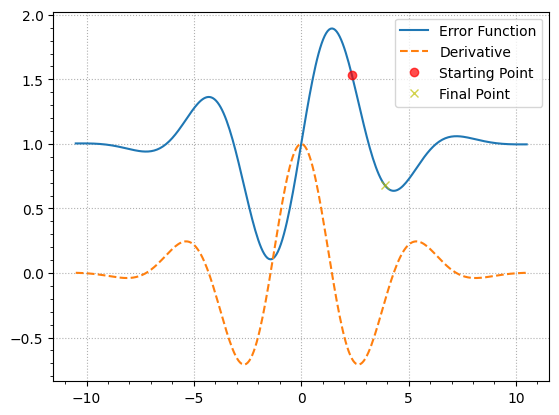

Starting Point: [2.36454849]
Starting Error: [1.53017282]

As observed, the gradient descent algorithm was useful for lowering the initial error.
However, visibly, it still did not reach the lowest point of the local minimum, nor did it find the local minimum with the least error.
So, hypothetically, the algorithm could be optimized.
Let's test different hypotheses in a parametric-experimental approach.
In this experimental approach, we will be fixing all parameters except one, which will be systematically varied.
The parameter will be starting error locations.
Then, we shall analize how each starting location affects the final result, after running the gradient descent algorithm.

Here is the distribution of the resulting error, when starting the gradient descent algorithm from different locations:


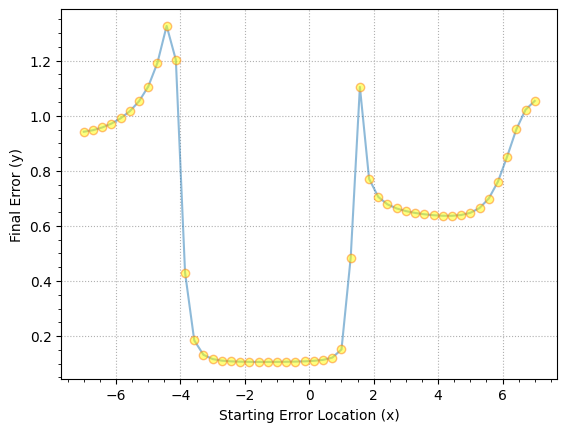


Conclusions:
1. Final Error was reduced by changing starting locations. The lowest error was found around the starting locations between -4 to 1,5.
2. It shows potential to avoid getting stuck with undesirable starts, like vanishing gradients or exploding gradients...
3. This could reveal better alternative starting positions among different waves, with deeper bottoms. Perhaps the much-sought global minimum. Unfocusing or widening the variable horizon might reveal other waves.
4. This could reveal better alternative starting positions within the same wave, closer to the bottom, requiring calculating less steps to reach. Focusing or tightening the variable horizon might reveal the best slope in the wave.
> For these reasons, it is recommended preferring the starting location yielding the least error.
However, there are other factors to consider, together or separately, before finalizing adjustments, like the learning rate or iterations...


In [ ]:
#@title Experiment 1: Startpoint
# NumPy. Matplotlib

import numpy
import matplotlib.pyplot as ploti

# Input. Function. Derivative
in1 = numpy.linspace(-7*1.5, 7*1.5, 300) # did this to prevent outbound
def fin1(in1):
  return 1 + ( numpy.sin(in1) * numpy.exp(-in1**2*0.05) )
def defin1(in1):
  return numpy.cos(in1) * numpy.exp(-in1**2*0.05) + numpy.sin(in1) * (-0.1*in1) * numpy.exp(-in1**2*0.05)
#fin1 = numpy.sin(in1) * numpy.exp(-in1**2*0.05)
#defin1 = numpy.cos(in1) * numpy.exp(-in1**2*0.05) + numpy.sin(in1) * (-0.1*in1) * numpy.exp(-in1**2*0.05) # altenatively use lambdify
#defin1 = -0.1*in1*numpy.exp(-0.05*in1**2)*numpy.sin(in1) + numpy.exp(-0.05*in1**2)*numpy.cos(in1)

#init_point = numpy.random.choice(in1, 1) # random start
proxy_min = init_point = numpy.random.choice(in1/1.5,1) # random start within bounds

# learn parameters
learn_rate = 0.01
train_sess = 300

# gradient descent
for learn_idx in range(train_sess):
  gradi = defin1(proxy_min)
  proxy_min = proxy_min - learn_rate * gradi

print("This is our gradient descent algorithm working an error function:")
ploti.plot(in1, fin1(in1), label="Error Function")
ploti.plot(in1, defin1(in1), "--", label="Derivative")
ploti.plot(init_point, fin1(init_point), "ro", label="Starting Point", alpha=.7)
ploti.plot(proxy_min, fin1(proxy_min), "yx", label="Final Point", alpha=.7)
#ploti.plot(proxy_min, defin1(proxy_min), "go", label="Final Deriv", alpha=.7)
ploti.grid(linestyle=":")
ploti.minorticks_on()
ploti.legend()
ploti.show()

print("Starting Point:", init_point)
print("Starting Error:", fin1(init_point))
#print("Local minimum found:", fin1(proxy_min))
#print("Local minimum found at:", proxy_min)

print("\nAs observed, the gradient descent algorithm was useful for lowering the initial error.")
print("However, visibly, it still did not reach the lowest point of the local minimum, nor did it find the local minimum with the least error.")
print("So, hypothetically, the algorithm could be optimized.")
print("Let's test different hypotheses in a parametric-experimental approach.")
print("In this experimental approach, we will be fixing all parameters except one, which will be systematically varied.")
print("The parameter will be starting error locations.")
print("Then, we shall analize how each starting location affects the final result, after running the gradient descent algorithm.")

start_locs = numpy.linspace(-7,7,50) # systematically varied starting locations
final_error = numpy.zeros(len(start_locs)) # initialize vector filled with 0s with the same lenght/dimensions

for start_idx1,proxy_min in enumerate(start_locs): # run the gradient descent as many times as in start_locs (50)
  for idx_gradi in range(train_sess): # the gradient descent algo
    gradi = defin1(proxy_min)
    proxy_min = proxy_min - learn_rate * gradi
  final_error[start_idx1] = fin1(proxy_min) # store each final error, after running each iteration of the gradient descent algo on each starting location

# graph
print("\nHere is the distribution of the resulting error, when starting the gradient descent algorithm from different locations:")
ploti.plot(start_locs, final_error, "-", alpha=0.5) # line
ploti.plot(start_locs, final_error, "o", markerfacecolor="yellow", alpha=0.5) # markers
ploti.xlabel("Starting Error Location (x)")
ploti.ylabel("Final Error (y)")
ploti.grid(linestyle=":")
ploti.minorticks_on()
ploti.show()

print("\nConclusions:")
print("1. Final Error was reduced by changing starting locations. The lowest error was found around the starting locations between -4 to 1,5.") # approximation
print("2. It shows potential to avoid getting stuck with undesirable starts, like vanishing- or exploding gradients...")
print("3. This could reveal better alternative starting positions among different waves, with deeper bottoms. Perhaps the much-sought global minimum. Unfocusing or widening the variable horizon might reveal other waves.")
print("4. This could reveal better alternative starting positions within the same wave, closer to the bottom, requiring calculating less steps to reach. Focusing or tightening the variable horizon might reveal the best slope in the wave.")
print("> For these reasons, it is recommended preferring the starting location yielding the least error.")
print("However, there are other factors to consider, together or separately, before finalizing adjustments, like the learning rate or iterations...")


This is our gradient descent algorithm working an error function:


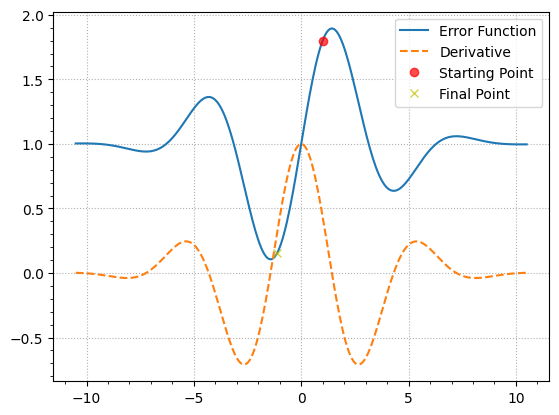

Starting Point: 1
Starting Error: 1.8004319606128645

This time, we fixed the starting position, along with everything else.
For this experiment, we will be systematically change the learning rate variable and analize how it affects outcomes.

Here is the distribution of the resulting error when different learning rates were used in the gradient descent algorithm:


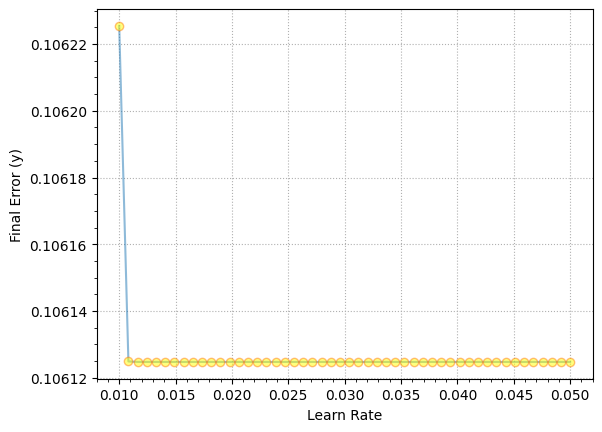


Conclusions:
1. Error was reduced by increasing learning rates.
2. It shows it is possible to reach improved outcomes, potentially with less steps, which would reduce calculations and thus computing power.
For these reasons, it is recommended preferring the learning rate yielding the least error.
However, increase and decrease learning rate with caution.
Too much could cause the algorithm to skip the local minimum onto another wave with another minimum.
Too little could cause algorithm to never reach the local minimum.
Also, there are other factors to consider before finalizing adjustments, like the starting location or iterations...


In [ ]:
#@title Experiment 2: Learnrate
# NumPy. Matplotlib

import numpy
import matplotlib.pyplot as ploti

# Input. Function. Derivative
in1 = numpy.linspace(-7*1.5, 7*1.5, 300) # did this to prevent outbound
def fin1(in1):
  return 1 + ( numpy.sin(in1) * numpy.exp(-in1**2*0.05) )
def defin1(in1):
  return numpy.cos(in1) * numpy.exp(-in1**2*0.05) + numpy.sin(in1) * (-0.1*in1) * numpy.exp(-in1**2*0.05)

#init_point = numpy.array([-6]) fixed start location
proxy_min = init_point = 1 # fixed start location

# learn parameters
learn_rate = 0.01
train_sess = 300

# gradient descent
for learn_idx in range(train_sess):
  gradi = defin1(proxy_min)
  proxy_min = proxy_min - learn_rate * gradi

print("This is our gradient descent algorithm working an error function:")
ploti.plot(in1, fin1(in1), label="Error Function")
ploti.plot(in1, defin1(in1), "--", label="Derivative")
ploti.plot(init_point, fin1(init_point), "ro", label="Starting Point", alpha=.7)
ploti.plot(proxy_min, fin1(proxy_min), "yx", label="Final Point", alpha=.7)
ploti.grid(linestyle=":")
ploti.minorticks_on()
ploti.legend()
ploti.show()

print("Starting Point:", init_point)
print("Starting Error:", fin1(init_point))

print("\nThis time, we fixed the starting position, along with everything else.")
print("For this experiment, we will be systematically change the learning rate variable and analize how it affects outcomes.")

# systematically varied learn rate
learn_rate = numpy.linspace(0.01, 0.05, 50)
#learn_rate = numpy.linspace(1e-10, 1e-1, 50) # 50 rates between 0.0000000001 to 0.1

final_error = numpy.zeros(len(learn_rate))

for idx_learn_rate in range(numpy.count_nonzero(learn_rate)):
  for idx_gradi in range(train_sess):
    gradi = defin1(proxy_min)
    proxy_min = proxy_min - gradi * learn_rate[idx_learn_rate]
  final_error[idx_learn_rate] = fin1(proxy_min)

# another method
# for idx_learn_rate, learnRate in enumerate(learn_rate):
#   for idx_gradi in range(train_sess):
#     gradi = defin1(proxy_min)
#     proxy_min = proxy_min - gradi * learnRate
#   final_error[idx_learn_rate] = proxy_min

print("\nHere is the distribution of the resulting error when different learning rates were used in the gradient descent algorithm:")
ploti.plot(learn_rate, final_error, "-", alpha=0.5)
ploti.plot(learn_rate, final_error, "o", alpha=0.5, markerfacecolor="yellow")
ploti.xlabel("Learn Rate")
ploti.ylabel("Final Error (y)")
ploti.minorticks_on()
ploti.grid(linestyle=":")
ploti.show()

print("\nConclusions:")
print("1. Error was reduced by increasing learning rates.")
print("2. It shows it is possible to reach improved outcomes, potentially with less steps, which would reduce calculations and thus computing power.")
print("For these reasons, it is recommended preferring the learning rate yielding the least error.")
print("However, increase and decrease learning rate with caution.")
print("Too much could cause the algorithm to skip the local minimum onto another wave with another minimum.")
print("Too little could cause algorithm to never reach a local minimum.")
print("Also, there are other factors to consider before finalizing adjustments, like the starting location or iterations...")


This is our gradient descent algorithm working an error function:


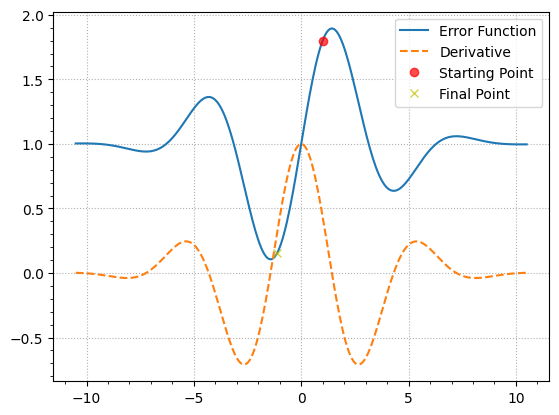

Starting Point: 1
Starting Error: 1.8004319606128645

This time, we fixed the starting position, along with everything else.
For this experiment, we will be systematically change the learning rate variable and analize how it affects outcomes.


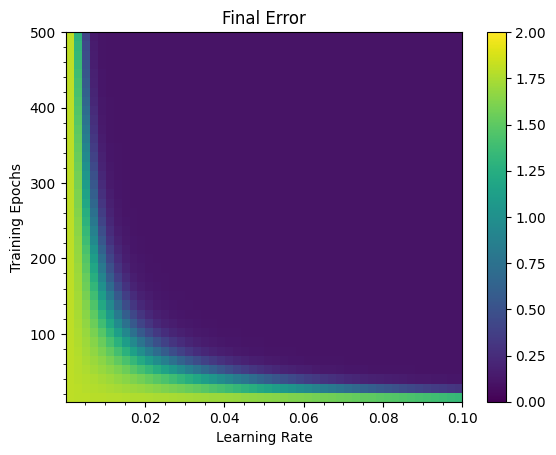

With a fixed starting position at 1, the best balance of learning rate and epochs to minimize error and calculations is observed around 0,03 learning rate and 150 epochs.
It can further be optimized. However, let's test if our rationale are correct.


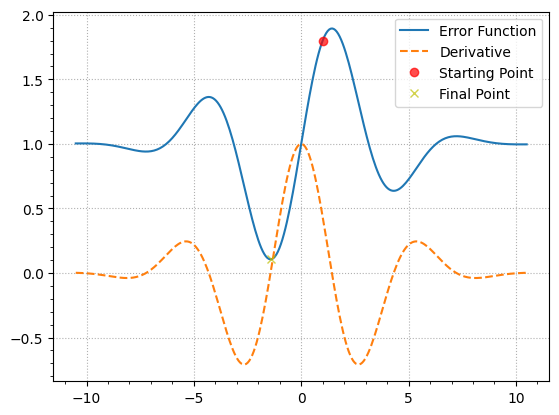


Congratulations! Our reasoning was demonstrably correct! The updated gradient results in less error and requires less calculations (epochs)!
Further recommendations: Rerun the startpoint experiment and improve the starting location. Then rerun the learnrate/epoch experiment to further optimize the algorithm.


In [ ]:
#@title Experiment 3: Learnrate & Epochs
# NumPy. Matplotlib

import numpy
import matplotlib.pyplot as ploti

# Input. Function. Derivative
in1 = numpy.linspace(-7*1.5, 7*1.5, 300) # did this to prevent outbound
def fin1(in1):
  return 1 + ( numpy.sin(in1) * numpy.exp(-in1**2*0.05) )
def defin1(in1):
  return numpy.cos(in1) * numpy.exp(-in1**2*0.05) + numpy.sin(in1) * (-0.1*in1) * numpy.exp(-in1**2*0.05)

#init_point = numpy.array([1]) fixed start location
proxy_min = init_point = 1 # fixed start location

# learn parameters
learn_rate = 0.01
train_sess = 300

# gradient descent
for learn_idx in range(train_sess):
  gradi = defin1(proxy_min)
  proxy_min = proxy_min - learn_rate * gradi

print("This is our gradient descent algorithm working an error function:")
ploti.plot(in1, fin1(in1), label="Error Function")
ploti.plot(in1, defin1(in1), "--", label="Derivative")
ploti.plot(init_point, fin1(init_point), "ro", label="Starting Point", alpha=.7)
ploti.plot(proxy_min, fin1(proxy_min), "yx", label="Final Point", alpha=.7)
ploti.grid(linestyle=":")
ploti.minorticks_on()
ploti.legend()
ploti.show()

print("Starting Point:", init_point)
print("Starting Error:", fin1(init_point))

print("\nThis time, we fixed the starting position, along with everything else.")
print("For this experiment, we will systematically change the learning rate variable and analize how it affects the outcomes.")

# systematically varied learn rate & train epochs
learn_rate = numpy.linspace (1e-10, 1e-1, 50)
train_epoch = numpy.round(numpy.linspace(10, 500, 40))

final_error = numpy.zeros((len(learn_rate), len(train_epoch))) # initialize matrix filled with 0s with the same lenght/dimensions

for idx_learn_rate, learnRate in enumerate(learn_rate):
  for idx_train_epoch,trainEpoch in enumerate(train_epoch):
    proxy_min = init_point # reset proxy_min to the initial point
    for idx_gradi in range(int(trainEpoch)):
      gradi = defin1(proxy_min)
      proxy_min = proxy_min - gradi * learnRate
    final_error[idx_learn_rate, idx_train_epoch] = fin1(proxy_min) # for error instead of location
#    final_error[idx_learn_rate, idx_train_epoch] = proxy_min

#fig,ax = ploti.subplots(figsize=(7,5))
ploti.imshow(final_error.T, extent=[learn_rate[0], learn_rate[-1], train_epoch[0], train_epoch[-1]], aspect="auto", origin="lower", vmin=0, vmax=2)
ploti.xlabel("Learning Rate")
ploti.ylabel("Training Epochs")
ploti.title("Final Error")
ploti.colorbar()
ploti.minorticks_on()
ploti.show()

# another visualization
# ploti.plot(learn_rate, fin1(final_error))
# ploti.xlabel("Learning rates")
# ploti.ylabel("Final function estimate")
# ploti.title("Each line is a training epoch")
# ploti.show()

print("With a fixed starting position at 1, the best balance of learning rate and epochs to minimize error and calculations is observed around 0,03 learning rate and 150 epochs.")
print("This could also be further optimized, many times over.")
print("For now, let's just test if our rationale is correct.")

# learn parameters
learn_rate = 0.03
train_sess = 150

# gradient descent
for learn_idx in range(train_sess):
  gradi = defin1(proxy_min)
  proxy_min = proxy_min - learn_rate * gradi

ploti.plot(in1, fin1(in1), label="Error Function")
ploti.plot(in1, defin1(in1), "--", label="Derivative")
ploti.plot(init_point, fin1(init_point), "ro", label="Starting Point", alpha=.7)
ploti.plot(proxy_min, fin1(proxy_min), "yx", label="Final Point", alpha=.7)
ploti.grid(linestyle=":")
ploti.minorticks_on()
ploti.legend()
ploti.show()

print("\nCongratulations! Our reasoning was demonstrably correct! The updated gradient results in less error and requires less calculations (epochs)!")
print("Further recommendations: Rerun the startpoint experiment and improve the starting location. Then rerun the learnrate/epoch experiment to further optimize the algorithm.")


##Artificial Neural Networks (ANN)

---
<details>

---
Artificial Neural Networks (ANNs)

An ANN is a web comprised of artificial neurons or perceptrons.

These perceptrons perform calculations, taking in inputs and releasing an output.

Typically, these calculations are scaled or weighted up or down, depending on the relevance they have on the predicted outcome.

Also, usually the output undergoes an additional calculation which helps interpreting this output or activate the next perceptron in the network. This calculation is called an activation function.

---
Simple Regression

Simple regression is predicting one continuous variable from another variable.

---


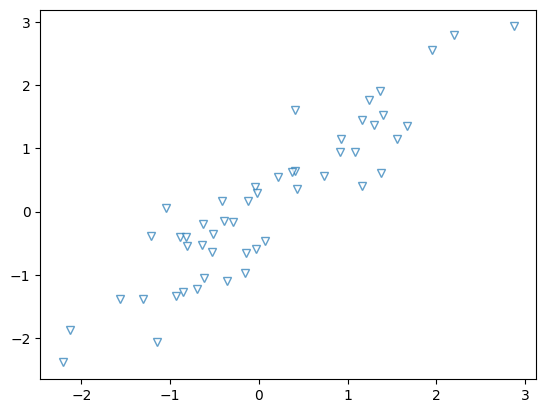

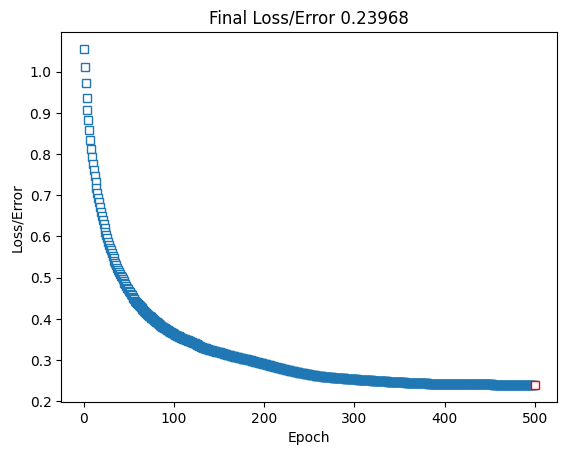

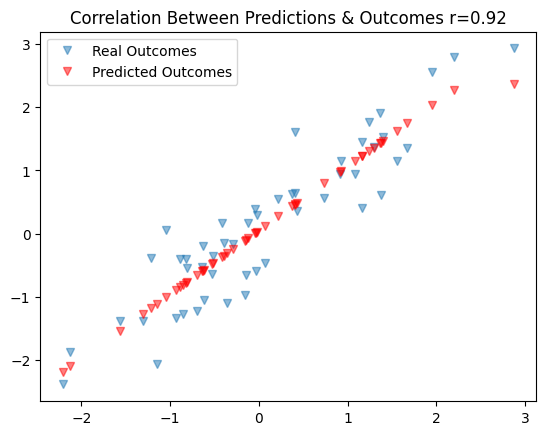

In [ ]:
#@title ANN Regression > PyTorch

import numpy
import torch
import torch.nn as norch
import matplotlib.pyplot as ploti

sample_size = 50
var1 = torch.randn(sample_size, 1)
var2 = var1 + torch.randn(sample_size, 1)/2 # creating a correlated (but still random) variable

ploti.plot(var1, var2, "v", markerfacecolor="w", alpha=0.7)
ploti.show()

ann_regri = norch.Sequential(
  norch.Linear(1,1), # input layer # 1,1 means 1 input, 1 output, no bias
  norch.ReLU(), # activation function
  norch.Linear(1,1), # input layer # 1,1 means 1 input, 1 output, no bias
)
"""
So, there is 1st layer that takes an input and gives and output.
Then, the second layer passes the 1st output through an activation function.
The 3rd layer takes the output from the previous layer as its own input and gives a final output.
"""
#ann_regri

# learning parameters
learn_rate = 0.05
epochs = 500

losses = torch.zeros(epochs)
loss_func = norch.MSELoss()

# type of gradient descent (optimize/minimize error)
optimizer = torch.optim.SGD(ann_regri.parameters(), lr= learn_rate) # SGD = Stockastic Gradient Descent

for idx_epochs in range(epochs):
  prediction = ann_regri(var1)
  loss = loss_func(prediction, var2)
  losses[idx_epochs] = loss

# backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

prediction_set = ann_regri(var1)

# final loss (MSE)
test_loss = (prediction_set - var2).pow(2).mean()

ploti.plot(losses.detach(), "s", markerfacecolor="w")
ploti.plot(epochs, test_loss.detach(), "rs", markerfacecolor="w")
ploti.xlabel("Epoch")
ploti.ylabel("Loss/Error")
ploti.title("Final Loss/Error %g" %test_loss.item())
ploti.show()

# predictions vs real outcomes
ploti.plot(var1, var2, "v", label="Real Outcomes", alpha=.5)
ploti.plot(var1, prediction_set.detach(), "rv", label="Predicted Outcomes", alpha=.5)
ploti.title(f"Correlation Between Predictions & Outcomes r={numpy.corrcoef(var2.T, prediction_set.detach().T)[0,1]:0.2f}")
ploti.legend()
ploti.show()
# .detach() strips data from the variable other than the valules, while remaining a tensor. doesn't work with all variables
#. item() strips the variable of data other than the numerical value. doesn't work with all variables


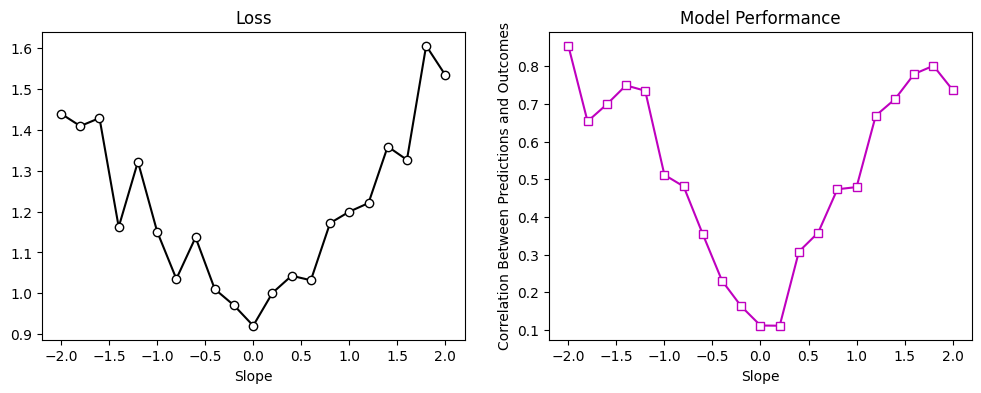

In [ ]:
#@title Manipulating ANN Regression

import numpy
import torch
import torch.nn as norch
import matplotlib.pyplot as ploti

# create data
def init_data(slope):
  sample_size = 50
  var1 = torch.randn(sample_size, 1) # 50 x 1 # gaussian_snd distribution
  var2 = var1*slope + torch.randn(sample_size, 1) # 50 x 1 # correlated with var1*var2 + gaussian_snd / 2
  return(var1,var2)

# train model
def model(var1, var2):
  ann_regri = norch.Sequential(
    norch.Linear(1,1), # input layer # 1,1 means 1 input, 1 output
    norch.LeakyReLU(), # activation function
    norch.Linear(1,1) # output layer # 1,1 means 1 input, 1 output
  )

  learn_rate = 0.05
  epochs = 400

  losses = torch.zeros(epochs)
  loss_func = norch.MSELoss()
  optimizer = torch.optim.SGD(ann_regri.parameters(), lr=learn_rate)

  for idx_epoch in range(epochs):
    prediction = ann_regri(var1) # need to fetch this from function
    loss = loss_func(prediction, var2)
    losses[idx_epoch] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  prediction_set = ann_regri(var1)

  return(prediction_set, losses)

#main function
slopes = numpy.linspace(-2, 2, 21)

total_experiments = 50

results = numpy.zeros((len(slopes), total_experiments, 2))

for idx_slope in range(len(slopes)):
  for current_experiment in range(total_experiments):
    var1, var2 = init_data(slopes[idx_slope])
    prediction, losses = model(var1, var2)
    prediction = prediction.detach()

    results[idx_slope, current_experiment, 0] = losses[-1].detach().item()
    results[idx_slope, current_experiment, 1] = numpy.corrcoef(var2.T, prediction.T)[0,1]

fig,ax = ploti.subplots(1,2,figsize=(12,4))
ax[0].plot(slopes, numpy.nanmean(results[:,:,0], axis=1), "ko-", markerfacecolor="w")
ax[0].set_xlabel("Slope")
ax[0].set_title("Loss")

ax[1].plot(slopes, numpy.nanmean(results[:,:,1], axis=1), "ms-", markerfacecolor="w")
ax[1].set_xlabel("Slope")
ax[1].set_ylabel("Correlation Between Predictions and Outcomes")
ax[1].set_title("Model Performance")
ploti.show()


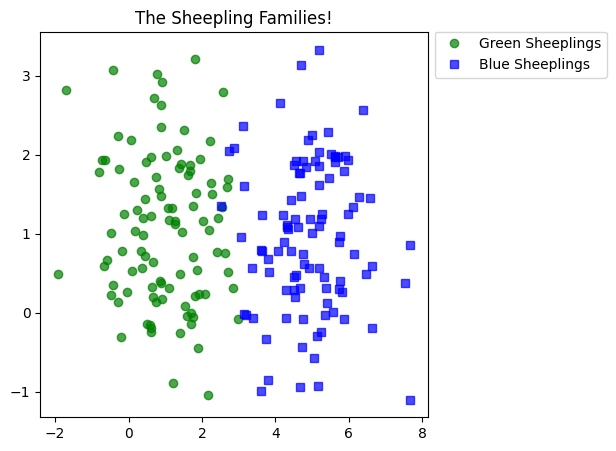


Meet our lovely Sheepling families!
Our Sheeplings love to play with each other, but sometimes they get lost.
Let's train our robot shepperd dog to identify them in order to prevent them getting lost or to safely lead them back to their families.



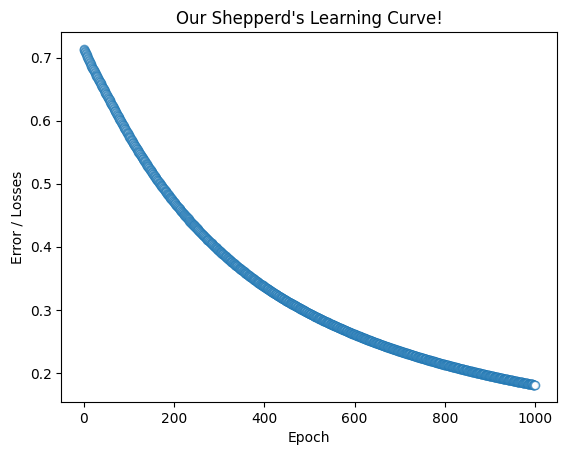

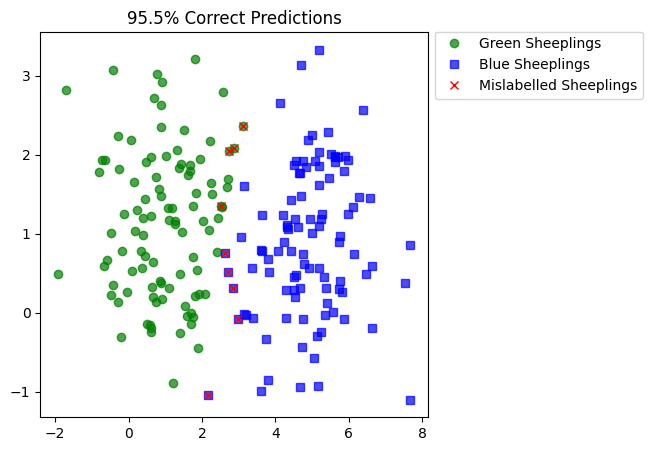


Our robo-doggo took care of: 95.5% Sheeplings!


In [ ]:
#@title ANN for Classification > PyTorch, Numpy

import torch
import torch.nn as norch
import numpy
import matplotlib.pyplot as ploti

group_size = 100
#spread = 2
coord1 = [1, 1]
coord2 = [5, 1]

# meet the 0 Green Sheeplings
group1 = [numpy.random.randn(group_size)+coord1[0], numpy.random.randn(group_size)+coord1[1]]
# meet the 1 Blue Sheeplings
group2 = [numpy.random.randn(group_size)+coord2[0], numpy.random.randn(group_size)+coord2[1]]

# Create numerical labels for the Green Sheeplings (0) and Blue Sheeplings (1) to compute with Binary-Cross-Entropy (BCE) (BCELoss)
labels_numpy = numpy.vstack((numpy.zeros((group_size, 1)), numpy.ones((group_size, 1))))
#merge the groups into a numpy 2d array
groups_numpy = numpy.hstack((group1, group2)).T

# convert into pytorch 2d tensor
groups_torch = torch.tensor(groups_numpy).float()
labels_torch = torch.tensor(labels_numpy).float()

fig = ploti.figure(figsize=(5,5))
ploti.plot(groups_torch[numpy.where(labels_torch==0)[0],0], groups_torch[numpy.where(labels_torch==0)[0], 1], "go", alpha=.7, label="Green Sheeplings")
ploti.plot(groups_torch[numpy.where(labels_torch==1)[0], 0], groups_torch[numpy.where(labels_torch==1)[0], 1], "bs", alpha=.7, label="Blue Sheeplings")
ploti.title("The Sheepling Families!")
ploti.legend(bbox_to_anchor=(1, 1.02))
ploti.show()

print("\nMeet our lovely Sheepling families!")
print("Our Sheeplings love to play with each other, but sometimes they get lost.")
print("Let's train our robot shepperd dog to identify them in order to prevent them getting lost or to safely lead them back to their families.\n")

#print(labels_numpy)
#print(group1[1],len(group1))
#print(data_numpy[1], data_numpy.shape)

ann_classer = norch.Sequential(
  norch.Linear(2,1),
  norch.ReLU(),
  norch.Linear(1,1),
  norch.Sigmoid()
)
ann_classer

learn_rate = 0.02
epochs = 1000

lossfun = norch.BCELoss() # binary cross entropy, instead of mean square average
# this is because we have a discrete binary outcome, instead of a continuous outcome
# consider BCEWithLogitsLoss(), because pytorch developers claim it is more stable and implements nn.Sigmoid() internally
losses = torch.zeros(epochs)

optimizer = torch.optim.SGD(ann_classer.parameters(), lr=learn_rate)

for idx_epoch in range(epochs):
  prediction = ann_classer(groups_torch)

  loss = lossfun(prediction, labels_torch)
  losses[idx_epoch] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

ploti.plot(losses.detach(), "o", markerfacecolor="w", alpha=0.7)
ploti.xlabel("Epoch")
ploti.ylabel("Error / Losses")
ploti.title("Our Shepperd's Learning Curve!")
ploti.show()

predictions = ann_classer(groups_torch) # from 0 to 1

predicted_labels = predictions > 0.5 # If bigger than 0.5 return True, else False

mislabel = numpy.where(predicted_labels != labels_torch)[0]
# Compare predicted labels with original labels to check where the sheeplings were mislabel.
# Returns True if mismatch (!=). numpy.where() returns the location where the condition was True. In this case, the indices are returned.
#print(mislabel) #debug

total_acc = 100-100*len(mislabel)/(2*group_size) #

fig = ploti.figure(figsize=(5,5))
ploti.plot(groups_torch[numpy.where(~predicted_labels)[0], 0], groups_torch[numpy.where(~predicted_labels)[0], 1], "go", label="Green Sheeplings", alpha=0.7)
ploti.plot(groups_torch[numpy.where(predicted_labels)[0], 0], groups_torch[numpy.where(predicted_labels)[0], 1], "bs", label="Blue Sheeplings", alpha=0.7)
ploti.plot(groups_torch[mislabel, 0], groups_torch[mislabel, 1], "rx", label="Mislabelled Sheeplings")
ploti.legend(bbox_to_anchor=(1, 1.02))
ploti.title(f"{total_acc}% Correct Predictions")
ploti.show()

print("\nOur robo-doggo took care of: %g%% Sheeplings!" %total_acc)


##T-Test

---

<details>
<summary>Details</summary>

---
The T-Test is a statistical test that allows comparing how two different dataset groups responded and ascertain whether the two are statistically different or not.

</details>

---
<details>
<summary>AI Models & T-Test</summary>

---
Different AI models provide different datasets.

These models may perform similarly or one may outperform the other.

If we are looking to for the best performing model, the t-test is a way to address this.

---
Under the t-test, there are two hypotheses. Either:
1. The alternative hypothesis (HA): A model outperforms another.
2. The null hypothesis (H0): The models are equivalent.

---
The T-Test seeks to answer which hypothesis is correct.

It tests whether there is significant evidence that one model outperformed another, by comparing their prediction with the actual outcome.

Significant evidence means overcoming the statistical significance threshold (AKA alpha level).

The alpha level is a probability that a researcher sets before a study to determine if the results are statistically significant.

Tipically, the most common threshold is 0.05 (or 5%).
This means that there is a 5% chance that the observed result could have occurred due to random chance.
The t-test can also be compared against a particular chance, like 50% accuracy (alpha level = 0.50) to see if a model is making random predictions, for example...

If the p-value is less than the chosen threshold (alpha level), the result is considered statistically significant. So one model did outperform.

The p-value is the probability that the t-value reflects the null hypothesis.

The probability of getting a t-value at least as extreme as the t-value actually observed under the assumption that the null hypothesis is correct is called the p-value.

The t-value is the result of the t-test and a fairly simple calculation: it's the difference of means divided by a measure of standard deviation. So, it's just the normalized difference between two groups. When two groups differ by a lot, the t-value is large and the p-value is closer to zero.

The t-value is the result of the t-test and represents the difference between the compared models.

t-value =
(the average of x minus the mean of y)
this is divided by
(standard deviations)

</details>

We have 2 groups of data from 2 different AI models.
Let's compare them and calculate if one model outperforms another using scipy .ttest_ind() function...



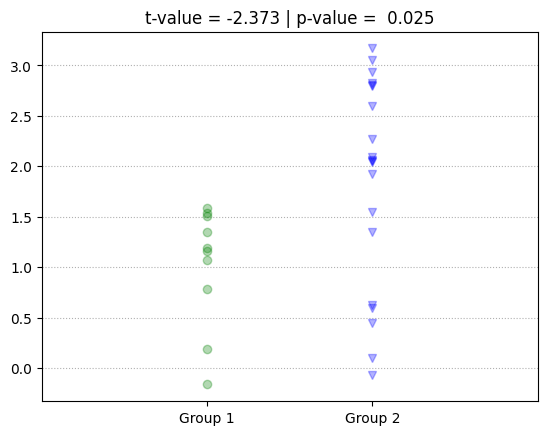


Conclusion:
There is significant statistical evidence that Model B outperformed Model A


In [ ]:
#@title T-Test
#NumPy. Matplotlib. SciPy.

import numpy as np
import matplotlib.pyplot as ploti
import scipy.stats as stats

# Population Averages
popavg1 = 1
popavg2 = 2

# Sample Groups
group1 = 10
group2 = 20

# Data Set
data1 = popavg1 + np.random.randn(group1)
data2 = popavg2 + np.random.randn(group2)

print("We have 2 groups of data from 2 different AI models.")
print("Let's compare them and calculate if one model outperforms another using scipy .ttest_ind() function...\n")

# T-Test
tvalue1, pvalue1 = stats.ttest_ind(data1, data2) # independent samples t-test
#print(tvalue1) # if t-value is negative, then data2 is better than data1
#print(pvalue1)

#scattered the points a bit...
ploti.plot(np.zeros(group1), data1, "go", alpha=0.3) # transparency
ploti.plot(np.ones(group2), data2, "bv", alpha=0.3) # transparency
#ploti.plot(0+np.random.randn(group1)/20, data1, "co") # dispersion
#ploti.plot(1+np.random.randn(group2)/20, data2, "yv") # dispersion
ploti.grid(axis="y", linestyle=":") # plot a grid
ploti.xlim([-1,2]) # centering...
ploti.xticks([0,1], labels=["Group 1", "Group 2"])
ploti.title(f"t-value = {tvalue1: .3f} | p-value = {pvalue1: .3f}") # As long as p-value is above 0,05 the performance/accuracy is not significantly different. Mind there was no data cleaning here, etc...
ploti.show()

alevel = 0.05
hypothesis0 = pvalue1 >= alevel

print("\nConclusion:")
if hypothesis0 == True:
  print("There is no significant statistical evidence that one model outperformed the other.")
else:
  print("There is significant statistical evidence that", "Model B" if tvalue1 < 0 else "Model A", "outperformed", "Model A" if tvalue1 < 0 else "Model B")

#else:
#  print("There is significant statistical evidence that", end=" ")
#  print("Model B" if tvalue1 < 0 else "Model A", end=" ")
#  print("outperformed", end=" ")
#  print("Model A" if tvalue1 < 0 else "Model B")

#else:
#  print("There is significant statistical evidence that one model outperformed the other.")
#  if tvalue1 < 0:
#    print("Model B (Group 2) outperformed Model A (Group 1)")
#  else:
#    print("Model A (Group 1) outperformed Model B (Group 2)")


#Misc

##Activation Functions
---
<details>

---
In artificial neural networks, the activation function of a node is a function that calculates the output of the node based on its individual inputs and their weights.

Nontrivial problems can be solved using only a few nodes if the activation function is nonlinear.

In a neural network this mathematical function applies to the output of a neuron.

It introduces non-linearity, enabling the model to learn and represent complex data patterns.

Without it, even a deep neural network would behave like a simple linear regression model.

Activation functions decide whether a neuron should be activated based on the weighted sum of inputs and a bias term.

They also make backpropagation possible by providing gradients for weight updates.

</details>

In [ ]:
#@title Signum > NumPy

import numpy

print("The sign() function can serve as an activation function.")

print("Here is what sign() returns when encountering positive numbers, negative numbers or zeroes...")

positive = numpy.random.randint(1, 10)
negative = -positive

print(f"\nWhen encountering the positive number, like {positive}:")
print(numpy.sign(positive))

print(f"\nWhen encountering the negative number, like {negative}:")
print(numpy.sign(negative))

print("\nWhen encountering 0")
print(numpy.sign(0))

# Praxis

print("\nLet's try to find an use for this...")

print("\nMeet Cashy, my artificial accountant.")
print("Cashy handles all my finances... Here, I'll show you...")
print("\nCashy, how much moneys did we profit last month?")

cashflow = numpy.random.randint(-9,10)

if numpy.sign(cashflow) == 1:
  print(f"We made {abs(cashflow)} moneys.")
elif numpy.sign(cashflow) == 0:
  print(f"We didn't make nor lose any moneys.")
elif numpy.sign(cashflow) == -1:
  print(f"We lost {abs(cashflow)} moneys.")


The sign() function can serve as an activation function.
Here is what sign() returns when encountering positive numbers, negative numbers or zeroes...

When encountering the positive number, like 2:
1

When encountering the negative number, like -2:
-1

When encountering 0
0

Let's try to find an use for this...

Meet Cashy, my artificial accountant.
Cashy handles all my finances... Here, I'll show you...

Cashy, how much moneys did we profit last month?
We made 7 moneys.


##Entropy

---

<details>

<summary>Concepts</summary>

---
>Shannon Entropy

Shannon Entropy describes the uncertainty, surprise or even error within a distribution of probability.

The higher the uncertainty of the outcome, the higher the entropy (across the distribution of events).

The lower the uncertainty of the outcome, the lower the entropy.

For example, if I bet on a game knowing I will win, then the entropy is minimal.

Likewise, if I bet against a game knowing I will lose, then the entropy is minimal.

However, if I bet on a game and the outcome is uncertain, then the entropy is higher.

A variable with predictable outcomes (like a loaded coin that always lands on heads) has low entropy, while a variable with many possible and equally likely outcomes (like a fair dice roll) has high entropy.

---
>Cross-Entropy

In Information Theory, entropy usually refers to one variable, the surprise.

However, in DL training, usually, the question is how well two variables match (category label vs. model prediction). Hence "cross" variable.

Cross entropy or categorical entropy is a loss function used in machine learning, especially for classification, that measures the difference between two probability distributions: the true label (the actual outcome) and the model's predictions.

It quantifies how (dis)similar the predictions align with the actual outcomes. Lower cross-entropy value indicate better performance. A perfect prediction results in (a loss of) 0.

---
>Binary Entropy

Binary entropy is a kind of cross entropy that accounts for two mutually exclusive outcomes for an event. Ex: heads or tails; alive or dead, on or off.

In [ ]:
#@title Entropy > NumPy

import numpy as np

probability = .40
improbability = 1 - probability

#chance = [.25, .75]
chance = [probability, improbability]

entro=0 # entropy

for probability in chance:
  entro += -( probability*np.log(probability) )
#happen = -( probability*np.log(probability) + (1-probability)*np.log(1-probability) ) # binary entropy

#binary cross-entropy

print("Correct entropy:", entro)

# Binary Cross Entropy

possibilities = [1, 0]
quota = [.25, .75] # probability of each outcome, like happening or not happening, cat or not cat.

entro=0
for i in range(len(possibilities)):
  entro -= possibilities[i]*np.log(quota[i])
  #entro += -( possibilities[i]*np.log(quota[i]) ) # the log is negative, so we can simply decrement (instead of incrementing) and remove the minus operation.

print("Correct entropy: " + str(entro))


Correct entropy: 0.6730116670092565
Correct entropy: 1.3862943611198906


In [ ]:
#@title Entropy > PyTorch

import torch
import torch.nn.functional as tfun

possibilities = torch.tensor([1.0, 0.0])
quota = torch.tensor([.25, .75])

tfun.binary_cross_entropy(quota,possibilities)


tensor(1.3863)

##Math Functions


This graph shows identity function, where x and y are equivalent and directly proportional


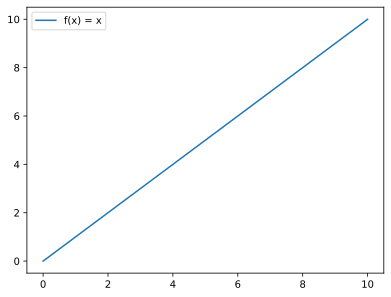


Here is the natural logarithm of x


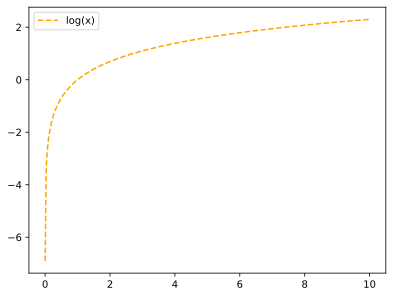


Here is the natural exponent of x


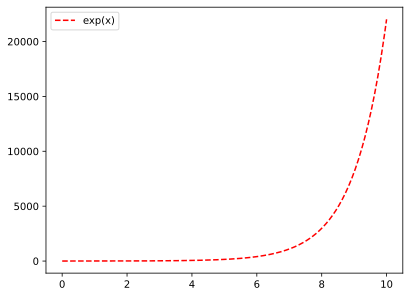


These 2 graphs llustrate how the log and exp cancel each other out, overlaping with the identity function


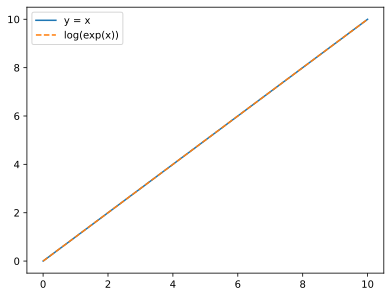

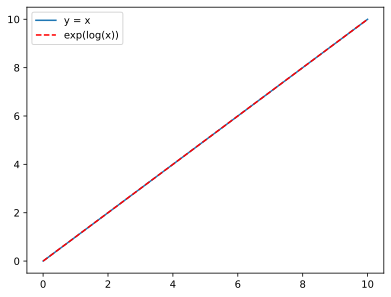

In [ ]:
#@title F(x), Log, Exp > NumPy

import numpy as np
import matplotlib.pyplot as ploti

x1 = np.linspace(.001,10,301) # 301 points, linearly separated between min .001 and max 10
logx1 = np.log(x1)
expx1 = np.exp(x1)

#ploti.rcParams.update({"font.size":15}) # use later for stylin

# Identity Function
print("\nThis graph shows identity function, where x and y are equivalent and directly proportional")

ploti.plot(x1, x1)
ploti.legend(["f(x) = x"])
ploti.show()

# Natural Logarythm
print("\nHere is the natural logarithm of x")
ploti.plot(x1, logx1, "orange", linestyle="--")
ploti.legend(["log(x)"])
ploti.show()

# Natural Exponent
print("\nHere is the natural exponent of x")
ploti.plot(x1, expx1, "r", linestyle="--")
ploti.legend(["exp(x)"])
ploti.show()

# Log cancels Exp
print("\nThese 2 graphs llustrate how the log and exp cancel each other out, overlaping with the identity function")
ploti.plot(x1,x1)
ploti.plot(x1, np.log(expx1), linestyle="--")
ploti.legend(["y = x", "log(exp(x))"])
ploti.show()

# Exp cancels Log
ploti.plot(x1,x1)
ploti.plot(x1, np.exp(logx1), "r", linestyle="--")
ploti.legend(["y = x", "exp(log(x))"])
ploti.show()


##Derivatives

---

<details>

<summary>Concepts</summary>

---

Derivatives

Derivatives (derivs) point the direction and rate of increases and decreases in a matematical funtion.

In deep learning the AIs error is represented in a (error) function.

Since we want to minimize error, the derivative can help pointing to decreases in error.

The smallest error possible would be the best solution, since the smallest error point gives the model's highest accuracy.

This is known as the minimum (plural minima). There will be a section for that, later.

---
Minima & Maxima

- The maxima (plural of maximum) are the highest points of a function (peaks).
- The minima (plural of minimum) are the lowest points of a function (off-peaks).

In machine learning, functions typically represent the model's error. So, the functions used are error functions.

Considering we are talking about error functions:
1. The maxima in an error function are the points where the model yields the most error or is the most inaccurate, which we want to avoid.

2. The minima in an error function are the points where the model yields the least error or is the most accurate, which we want to optimize.

Since we want to avoid error and optimize the model, the principal purpose of computing derivatives in gradient descent algorithm is to identify these minima, where the error is minimal.

The main reason for using derivatives, is because derivatives point to error decreases. Also, whenever the error function is at an off-peak (minimum point), the derivative of that error function is at zero.

These facts helps identifying those minimal points of minimum error, by using derivatives.

For this reason, when we plot an error function, we also plot its derivative.

That is why the gradient descent algoritm is used, because it provides a better solution, as long as it is in a curve and not flat. There is a section for that.

However, derivatives also zero out at error peaks (maximum point) of the error function or when the function flats. Since we want to avoid those, this should be accounted for.

However, this is close to impossible to do in complex functions with millions of parameters or dimensions.

---
Local vs Global Minima/Maxima

A local minimum is the lowest point across its immediate neighbourhood.

A global minimum is lowest point across an entire function.

So, a global minimum is also a local minimum, but a local minimum may not be the global minimum.

Also, there can be multiple global minima, if they are tied...

Same applies for local and global maximum.

The plural of minimum is minima. The plural of maximum is maxima.

---
Local Minima indicators
- Derivative is 0.
- Double derivative is positive.

---
Double Derivatives

A double derivative is the derivative of a derivative.

---
Partial Derivatives

Partial derivatives are the result of the calculation of a derivative, ignoring other dimensions.

</details>

Please input the function expression.
The algoritm will try to calculate the derivative:
sin(x)

Computing derivative...
cos(x)

Drawing function and derivative...


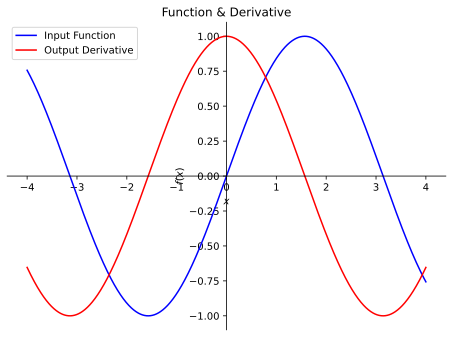

In [ ]:
#@title Deriv Calculator & Plotter > SymPy
# I call this Derivator.

import sympy # Symbolic Math in Python
import sympy.plotting.plot as symplot

x = sympy.symbols('x') # Sympy symbolic variable

print("Please input the function expression.")
print("The algoritm will try to calculate the derivative:")
expression = input()

if expression == "":
  print("\nAssuming default expression: f(x) = x")
  expression = x # Default function/expression
else:
  expression = sympy.sympify(expression)
#  expression = eval(expression)
#  numpy.frompyfunc(expression, 1, 1)

df_output = sympy.diff(expression, x) # Derivative

print("\nComputing derivative...")
print(df_output)

#print("\nComputing double derivative...")
#print(sympy.sympify(sympy.sympify(expression)))

print("\nDrawing function and derivative...")
fig1 = symplot(expression,(x,-4,4),label="Input Function",show=False,line_color="b")
fig1.extend(symplot(df_output,(x,-4,4),label="Output Derivative",show=False,line_color="r"))

fig1.legend = True
fig1.title = "Function & Derivative"
fig1.show()


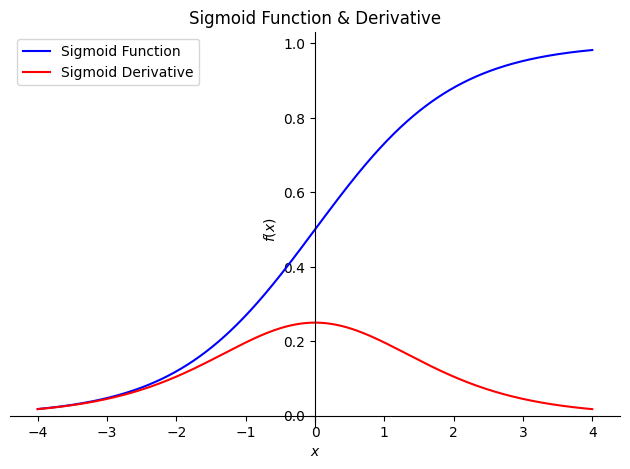

In [ ]:
#@title Sigmoid Deriv > SymPy

import matplotlib.pyplot as ploti
import sympy # Symbolic Math in Python
import sympy.plotting.plot as symplot

"""
Sigmoid functions are important for machine learning.
The reason for this is because they can convert their inputs into continuous outputs between 0 and 1.
This is useful to convert arbitrary values into error or probability functions.
"""

x = sympy.symbols('x') # Sympy symbolic variable
fx_sigmoid = 1 / (1+sympy.exp(-x)) # Sigmoid Function > f(x) = sigmoid(x)
# df_sigmoid = sympy.diff(fx_sigmoid) # Derivative of Sigmoid > df(sigmoid)

# Graph
fig1 = symplot(fx_sigmoid,(x,-4,4),label="Sigmoid Function",show=False,line_color="b")
fig1.extend(symplot(sympy.diff(fx_sigmoid),(x,-4,4),label="Sigmoid Derivative",show=False,line_color="r"))
fig1.legend = True
fig1.title = "Sigmoid Function & Derivative"
fig1.show()


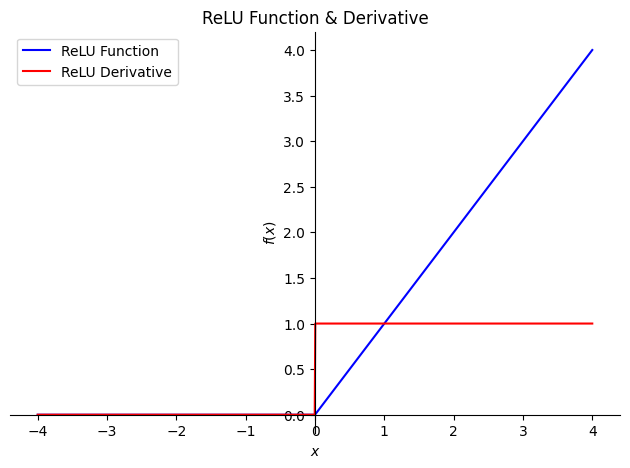

In [ ]:
#@title ReLU Deriv > SymPy

import matplotlib.pyplot as ploti
import sympy # Symbolic Math in Python
import sympy.plotting.plot as symplot

x = sympy.symbols('x') # Sympy symbolic variable
fx_relu = sympy.Max(0,x) # ReLU Function (Rectified Linear Unit) > f(x) = ReLU(x)
# df_relu = sympy.diff(relu) # Derivative of ReLU > df(ReLU)

# Graph
fig1 = symplot(fx_relu,(x,-4,4),label="ReLU Function",show=False,line_color="b")
fig1.extend(symplot(sympy.diff(fx_relu),(x,-4,4),label="ReLU Derivative",show=False,line_color="r"))
fig1.legend = True
fig1.title = "ReLU Function & Derivative"
fig1.show()


Function (fx) = 2*x**2
Derivative (df) = 4*x


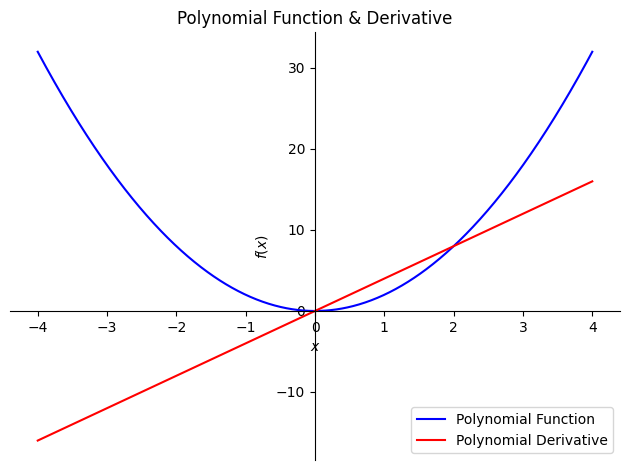

In [ ]:
#@title Polynomial Deriv > SymPy

import matplotlib.pyplot as ploti
import sympy # Symbolic Math in Python
import sympy.plotting.plot as symplot

x = sympy.symbols('x') # Sympy symbolic variable
fx_poly = 2*x**2 # Polynomial Function > fx = 2*x**2
df_poly = sympy.diff(fx_poly,x) # Derivative > df = 4*x

print("Function (fx) =", fx_poly)
print("Derivative (df) =", df_poly)

fig1 = symplot(fx_poly,(x,-4,4),label="Polynomial Function",show=False,line_color="b")
fig1.extend(symplot(df_poly,(x,-4,4),label="Polynomial Derivative",show=False,line_color="r"))
fig1.legend = True
fig1.title = "Polynomial Function & Derivative"
fig1.show()

#to plot them on individual figures
#symplot(fx_poly,(x,-4,4),title="Polynomial Function")
#ploti.show()
#symplot(df_poly,(x,-4,4),title="Polynomial derivative")
#ploti.show()


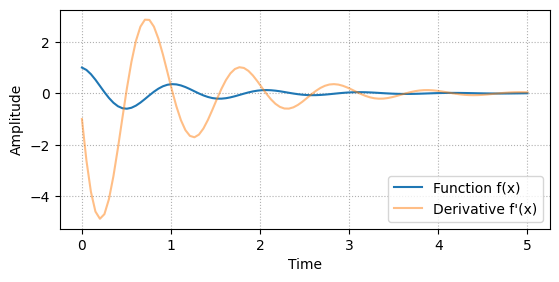

In [ ]:
#@title Damped Oscilation Deriv > NumPy

import matplotlib.pyplot as ploti
import numpy

x1 = numpy.linspace(0.0, 5.0, 100)
y1 = numpy.cos(2 * 3 * x1) * numpy.exp(-x1)
dy1 = -6*numpy.exp(-x1)*numpy.sin(6*x1) - numpy.exp(-x1)*numpy.cos(6*x1)

fig, ax = ploti.subplots(figsize=(7, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1, label="Function f(x)")
ax.plot(x1, dy1, label="Derivative f'(x)", alpha=0.5)
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
ploti.grid(linestyle=":")
ploti.legend(loc="lower right")
ploti.show()

In [ ]:
#@title Product Rule

#import numpy
import sympy
from sympy import * # for simplify()
from IPython.display import display # Jupyter/IPython notebook library to display LaTeX characters. display()

x = sympy.symbols("x") # create symbolic variable

fx = 2*x**2
gx = 4*x**3 - 3*x**4

# Derivative via function
dfx, dgx = sympy.diff(fx), sympy.diff(gx)

# Product Rule of fx * gx
pr_manual = dfx * gx + fx * dgx # derivative of f * function of g + function of x * derivative of g

# Product Rule via SymPy function
pr_sympy = sympy.diff( fx * gx )

# f(x) + df(x)
print("Function f(x)")
display(fx)
print("Derivative df(x)")
display(dfx)
print()

# g(x) + df(x)
print("Function g(x)")
display(gx)
print("Derivative dg(x)")
display(dgx)
print()

#product rule
print("Product rule of f(x)*g(x) (SimPy)")
display(pr_sympy)
print("Product rule of f(x)*g(x) (manual)")
display(pr_manual)
print()

# simplified expression
print("Simplified product rule of f(x)*g(x) (SymPy)")
display(simplify(pr_sympy))
print("Simplified product rule of f(x)*g(x) (manual)")
display(simplify(pr_manual))


Function f(x)


2*x**2

Derivative df(x)


4*x


Function g(x)


-3*x**4 + 4*x**3

Derivative dg(x)


-12*x**3 + 12*x**2


Product rule of f(x)*g(x) (SimPy)


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

Product rule of f(x)*g(x) (manual)


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)


Simplified product rule of f(x)*g(x) (SymPy)


x**4*(40 - 36*x)

Simplified product rule of f(x)*g(x) (manual)


x**4*(40 - 36*x)

In [ ]:
#@title Chain Rule

import sympy
from sympy import * # for simplify()
from IPython.display import display # Jupyter/IPython Notebook library to display LaTeX characters. display()

x = sympy.symbols("x") # create symbolic variable

gx = x**2 + 4*x**3
fx = (gx)**5 # embedded function

print("Function f(x)")
display(fx)# fx LaTeX
print("Simplified f(x)")
display(simplify(fx))
print()

print("Derivative df(x)")
display(sympy.diff(fx)) # fx LaTeX
print("Simplified Derivative df(x)")
display(simplify(sympy.diff(fx))) # fx LaTeX


Function f(x)


(4*x**3 + x**2)**5

Simplified fx


x**10*(4*x + 1)**5


Derivative df(x)


(60*x**2 + 10*x)*(4*x**3 + x**2)**4

Simplified Derivative df(x)


x**9*(4*x + 1)**4*(60*x + 10)

##Operators

In [ ]:
#@title Arithmetic Operators > Python
print("Arithmetic/Algebraic Operators") # Operators are things/token/symbols that act/operate on other things/operands

a, b = 10, 5
print(f"{a} + {b} = {a + b}      > Addition")
print(f"{a} - {b} = {a - b}       > Subtraction")
print(f"{a} * {b} = {a * b}      > Multiplication")
print(f"{a} / {b} = {a / b}     > Division (Float)")

print()
time1, clock12 = 18, 12
runtime1, clock24 = 100, 24
print(f"{a} ** {b} = {a ** b} > Exponentiation (10 to the power of 5) or (10*10*10*10*10) or (10^5)")
print(f"{a} // {b} = {a // b}      > Floor Division (the number a times a number fits tidly into another)")
print(f"{a} % {b} = {a % b}       > Modulus (remainder or difference after dividing 10 by 5)")

print("\nPractical Uses")
print("Floor division can be useful for counting time.")
print(f"For example, let's say, I have been playing a game for {runtime1} hours. Using this operator, it is possible to calculate that I have been playing the game for {runtime1 // clock24} days (and {runtime1 - (clock24*(runtime1 // clock24))} hours). {runtime1} // {clock24} = {runtime1 // clock24}. Maybe I should take a break :)")
print(f"Another example, let's say, I have been training Calisthenics for 45 days and each month has 30 days. Then, I have been training for {45 // 30} month(s).")
print(f"Lastly, let's say, I have been training martial arts for 200 months and each year has 12 months. Then, I have been training for {200 // 12} year(s). Pretty long time!")

print("\nModulus is also useful for counting time. Namely for clocks, which wrap around every 12 or 24 hours (12am vs 12pm vs 24h).")
print(f"For example, let's say, it is 18:00 on a {clock24} hour clock. On an {clock12} hour clock, it is {time1 % clock12}pm. {time1} % {clock12} = {time1 % clock12}")


Arithmetic/Algebraic Operators
10 + 5 = 15      > Addition
10 - 5 = 5       > Subtraction
10 * 5 = 50      > Multiplication
10 / 5 = 2.0     > Division (Float)

10 ** 5 = 100000 > Exponentiation (10 to the power of 5) or (10*10*10*10*10) or (10^5)
10 // 5 = 2      > Floor Division (the number a times a number fits tidly into another)
10 % 5 = 0       > Modulus (remainder or difference after dividing 10 by 5)

Practical Uses
Floor division can be useful for counting time.
For example, let's say, I have been playing a game for 100 hours. Using this operator, it is possible to calculate that I have been playing the game for 4 days (and 4 hours). 100 // 24 = 4. Maybe I should take a break :)
Another example, let's say, I have been training Calisthenics for 45 days and each month has 30 days. Then, I have been training for 1 month(s).
Lastly, let's say, I have been training martial arts for 200 months and each year has 12 months. Then, I have been training for 16 year(s). Pretty long time!


In [ ]:
#@title Logical Operators > Python

import random

#and: Returns True, if both conditions are true. Otherwise returns False.
#or: Returns True, if one condition must be true. Otherwise, returns False.
#not: Reverses the result. If the condition returned False, it reverses to True. If the condition returned True, it reverses to False.

x = random.randint(0,10)
print("Our variable x is:", x)

print("\nLet's check if x bigger than 0 AND smaller than 5...")
print("Answer:", x > 0 and x < 5)

print("\nNow, let's check if x is 0 OR 5...")
print("Answer:", x == 0 or x == 5)

print("\nNow, let's check if x is neither 0 OR 5, reversing the previous result...")
print("Answer:", not(x == 0 or x == 5))

print("\nNow, let's check if x is neither 0 OR 5, reversing the previous result...")

Our variable x is: 2

Let's check if x bigger than 0 AND smaller than 5...
Answer: True

Now, let's check if x is 0 OR 5...
Answer: False

Now, let's check if x is neither 0 OR 5, reversing the previous result...
Answer: True

Now, let's check if x is neither 0 OR 5, reversing the previous result...


##Random

In [ ]:
#@title Random > NumPy

import numpy

# 3 random ints
print("\n3 random integers")
print(numpy.random.randint(10, size=3)) # from 0 to 9 (lower limit is included, upper limit is excluded). half-open interval.

# 3 random Gaussian (SND) floats
print("\n3 random Gaussian (SND) floats")
print(numpy.random.randn(3))

# 3 random floats from 0 to 1
print("\n3 random floats from 0 to 1")
print(numpy.random.random(3))

# 3 random floats from 0 to 10
print("\n3 random floats from 0 to 10")
print(numpy.random.random(3)*10)

# 3 random floats from -X to +Y
print("\n3 random floats from -X to +X")
lobound = 50
hibound = lobound*2
print(numpy.random.random(3)*hibound-lobound) # numpy.random.random(3)*50*2-50
# print("Lowest value:", 0*hibound-lobound), print("Highest value:", 1*hibound-lobound) # debug min and max values

# Randomly choose 1 value (number or string)
print("\nRandomly chooses 1 value from a given group")
print(numpy.random.randint(3)+1, end=" ") # number
print(numpy.random.choice(["Apples", "Bananas", "Blueberries", "Grapes", "Kakis", "Mangos", "Oranges", "Strawberries"])) # string

# Randomply pick 3 repeatable values from a group of choices
list_exercises = ["Pull-ups", "Crunches", "Squats", "Push-ups", "Dips"]
print("\nWorkout Plan:")
print(numpy.random.choice(list_exercises, 3))

# Workout with reps and sets
#for idx1 in range(numpy.random.randint(2)+2):
#  print(numpy.random.choice([6, 5, 9]), end=" ")
#  print(numpy.random.choice(list_exercises))

# Randomly pick 3 unique values from a group of choices
total_choices=3
list_sweet = ["Chocolate", "Pie", "Bubble Tea", "Ice Cream", "Cheese Cake", "Strudel", "Pastel de Nata", "Tiramisu", "Pudding"]
print("\n3 Sweet recommendations:")
print(numpy.random.choice(list_sweet, total_choices, replace=False))



3 random integers
[7 2 5]

3 random Gaussian (SND) floats
[ 0.94210378  0.96018665 -1.00085794]

3 random floats from 0 to 1
[0.17518279 0.66172531 0.60842986]

3 random floats from 0 to 10
[8.80012251 7.77492773 8.083653  ]

3 random floats from -X to +X
[22.72812828 38.30077654 27.21260852]

Randomly chooses 1 value from a given group
2 Mangos

Workout Plan:
['Push-ups' 'Push-ups' 'Push-ups']

3 Sweet recommendations:
['Pie' 'Strudel' 'Ice Cream']


In [ ]:
#@title Random > PyTorch

import torch

#floats
print(torch.rand(3)) # returns a tensor with 3 floats between 0 and 1. These numbers will be uniformly distributed.
print(torch.randn(3)) # returns a tensor with 3 numbers. These numbers will have a standard normal distribution.

print()
print(torch.randn(3, 100).shape) # returns a 2D tensor with 300 (3x100) random numbers.
print(torch.randn(3, 100, 5).shape) # returns a 3D tensor with 1500 (3x100x5) random numbers.

"""
The standard normal distribution (SND) is a type of Gaussian distribution.
The SND has an average around 0 and a standard deviation of 1.
Average around zero means that the average of those randomly generated numbers will be zero.
Standard deviation of 1 means that around:
- 68% of those numbers will fall within -1 or +1, relative to that average.
- 95% of those numbers fall within -2 or +2.
- 99.7% within -3 or +3.
Since the average is 0, then 68% of the numbers will be distributed between -1 and 1.
If the average was 10, then 68% of the numbers would be distributed between 9 and 11.
When plotted, this distribution forms a bell shape.
A Gaussian distribution can have any mean and deviation.
"""

print()

#ints
print(torch.randint(0, 10, [3])) # From 0 to 9. Generate 3 numbers
print(torch.randint(0, 10, (3,))) # From 0 to 9.


tensor([0.2463, 0.0591, 0.2236])
tensor([-0.6540, -1.0092, -0.7326])

torch.Size([3, 100])
torch.Size([3, 100, 5])

tensor([9, 5, 8])
tensor([2, 5, 2])


In [ ]:
#@title Random > Random + String
# Import string and random module
import string # for string.ascii_letters
import random # random.choice(), random.shuffle()

# 3 random ints
print(random.randint(2,4))
# unlike NumPy's halfopen interval, both limits are included.
print()

# Randomly choose a letter from all the ascii_letters
rndstr1 = random.choice(string.ascii_letters)
print("Here is a random letter:", rndstr1)

#Shuffle the elements of a list
list_fruit = ["Apples", "Bananas", "Blueberries", "Cherries", "Grapes", "Kakis", "Mangos", "Oranges", "Strawberries"]
random.shuffle(list_fruit)
print()
print(list_fruit)
print(type(list_fruit))

print("\nRandomly chooses a value from a given choice")
print(random.choice([360, 1324, 9999]), end=" ")
print(random.choice(list_fruit)) # Can be strings
print()

# picks k elements from a list. elements msy be equally random or weighted
print("Equally random")
print(random.choices(list_fruit, k = 5))
print()

print("Loaded chance the first element is more likely than the others")
print(random.choices(list_fruit, weights = [16, 1, 1, 1, 1, 1, 1, 1, 1], k = 5))






3

Here is a random letter: s

['Grapes', 'Cherries', 'Strawberries', 'Kakis', 'Blueberries', 'Oranges', 'Mangos', 'Bananas', 'Apples']
<class 'list'>

Randomly chooses a value from a given choice
1324 Strawberries

Equally random
['Strawberries', 'Kakis', 'Mangos', 'Mangos', 'Mangos']

Loaded chance the first element is more likely than the others
['Grapes', 'Grapes', 'Grapes', 'Grapes', 'Grapes']


In [ ]:
#@title General Seed > NumPy

"""
In NumPy, it is possible to reproduce the same random results (numbers) through seeding.
That is because randomness is dependant on a seed, which is usually time-dependant.
Fixing the seed (or time) will fix the (pseudo)randomly generated number.
So, as long as the seed remains the same (fixed), the generated number will remain the same.
"""

import numpy as np

# Fixing global seed
np.random.seed(99) # Fixed the random seed generally/globally affects all randomly generated numbers. Locally fixed seeds overrides this.

print("np.random.rand(3)")
print("Generating 3 floats:")
print(np.random.randn(3))
print("The result should be fixed: \n[-0.14235884  2.05722174  0.28326194]")

print("\nGenerated integers:", np.random.randint(0, 10, size=3))
print("The result should be fixed: [3 7 1]")

print("\nFixing a seed 'locally' for one variable, via np.random.RandomState()")
seed5 = np.random.RandomState(5) # fixed the seed locally, for this variable. Other variables are unnaffected by this.
print("\nGenerated float:", seed5.rand(3))
print("The result should be fixed: \n[0.22199317 0.87073231 0.20671916]")
print("Instead of: \n[-0.14235884  2.05722174  0.28326194]")


np.random.rand(3)
Generating 3 floats:
[-0.14235884  2.05722174  0.28326194]
The result should be fixed: 
[-0.14235884  2.05722174  0.28326194]

Generated integers: [3 7 1]
The result should be fixed: [3 7 1]

Fixing a seed 'locally' for one variable, via np.random.RandomState()

Generated float: [0.22199317 0.87073231 0.20671916]
The result should be fixed: 
[0.22199317 0.87073231 0.20671916]
Instead of: 
[-0.14235884  2.05722174  0.28326194]


In [ ]:
#@title General Seed > PyTorch

import torch

torch.manual_seed(11) # fixes the seed generally

#floats
print(torch.randn(3))
print()

#ints
print(torch.randint(0, 10, [3])) # From 0 to 9. Generate 3 numbers


tensor([ 0.7376,  1.9459, -0.6995])

tensor([7, 7, 2])


In [ ]:
#@title Targeted Seed > NumPy

print("Fixed a seed locally for one variable, via np.random.RandomState(5)")
seed5 = np.random.RandomState(5) # fixed the seed 'locally', for this variable. Other random generations are unnaffected by this.
print("\nGenerating 3 values for seeded variable")
print("\nGenerated floats:\n", seed5.rand(3))
print("The result should be fixed:\n [0.22199317 0.87073231 0.20671916]")
print("\nGenerated floats:\n", seed5.rand(3))
print("The result should be different from above, but still fixed:\n [0.91861091 0.48841119 0.61174386]")

print("\nFixed a seed locally for one variable, via np.random.RandomState(20251025)")
seed5 = np.random.RandomState(20251025) # fixed the seed 'locally', for this variable. Other random generations are unnaffected by this.
print("\nGenerating 3 values for seeded variable")
print("\nGenerated integers:", seed5.randint(10, size=3))
print("The result should be fixed: [1 1 3]")


print("\nGenerating 3 random integers")
print("Generated number:", np.random.randint(10, size=3))
print("As you can see, the random integers are constantly changing without being fixed by the local seeds.")


Fixed a seed locally for one variable, via np.random.RandomState(5)

Generating 3 values for seeded variable

Generated floats:
 [0.22199317 0.87073231 0.20671916]
The result should be fixed:
 [0.22199317 0.87073231 0.20671916]

Generated floats:
 [0.91861091 0.48841119 0.61174386]
The result should be different from above, but still fixed:
 [0.91861091 0.48841119 0.61174386]

Fixed a seed locally for one variable, via np.random.RandomState(20251025)

Generating 3 values for seeded variable

Generated integers: [1 1 3]
The result should be fixed: [1 1 3]

Generating 3 random integers
Generated number: [2 9 8]
As you can see, the random integers are constantly changing without being fixed by the local seeds.


##Average

In [ ]:
#@title Average, Variance > NumPy

import numpy as np

teamchoco = [-3,-2,-1,1,2,3,5,5]
n1 = len(teamchoco)

print("Here's a bunch of numbers. They represent Team Choco. They like chocolate.")
print(teamchoco)

#average mean()
avg1 = np.mean(teamchoco)
print("\nHere's their average, via np.mean(teambros)")
print(avg1)

teamrainbow = [-30,-20,-10,10,20,30,5,5]
n2 = len(teamrainbow)
print("\nHere. Have a few more numbers. These represent Team Rainbow. They like many things, like smoothies, slushies, bubble tea, but not chocolate.")
print(teamrainbow)

avg2 = np.sum(teamrainbow)/n2
print("\nHere's their average, via np.sum(teamdivas)/n (n is the number of team members))")
print(avg2)

print("\nAs you can see, even though their average is the same, their distribution, likes, etc is very different.")
teams = teamchoco + teamrainbow
avg3 = np.mean(teams)
print(avg3)
print(f"Even if these two teams were merged into one, their average would not change ({avg3}).")
#var3 = np.var(teams)
#print(var3)
print("I'm also sure you can tell it is unlikely they would get along...")
print("Averages are pretty nice, but sometimes they are just not the best was to describe a population or situation...")

print("To deal with this kind of issue, sometimes it helps to quantify the distribution of groups, before deciding what to do.")
print("In NumPy, this can be done with the variance function: np.var()")
"""
To get an unbiased variance, add 1 per each known element to ddof=
Each 1 added to ddof= removes 1 bias.
There is 1 bias per known element in the group.
The mean counts as a known element.
"""
var1, var2 = np.var(teamchoco, ddof=1), np.var(teamrainbow, ddof=1) # unbiased
#var2 = (1/(n2-1)) * np.sum( (teamrainbow - avg2 ) **2) unbiased

#var1, var2 = np.var(teamchoco), np.var(teamrainbow) # biased
# var2 = (1/(n2)) * np.sum( (teamrainbow - avg2 ) **2) # biased

print("\nTeam Choco variance:", var1)
print ("\nTeam Rainbow variance:", var2)

print("\nAs we can see, Team Choco has lower variance than Team Rainbow.")

print("In such cases, it might be better to provide 2 different solutions for the two distinct groups, instead of providing 1 solution based on the average and make both unhappy :(")
print("Additionally, Rainbow team members could be provided with unique solutions, individually, given how unique they are :)")


Here's a bunch of numbers. They represent Team Choco. They like chocolate.
[-3, -2, -1, 1, 2, 3, 5, 5]

Here's their average, via np.mean(teambros)
1.25

Here. Have a few more numbers. These represent Team Rainbow. They like many things, like smoothies, slushies, bubble tea, but not chocolate.
[-30, -20, -10, 10, 20, 30, 5, 5]

Here's their average, via np.sum(teamdivas)/n (n is the number of team members))
1.25

As you can see, even though their average is the same, their distribution, likes, etc is very different.
1.25
Even if these two teams were merged into one, their average would not change (1.25).
I'm also sure you can tell it is unlikely they would get along...
Averages are pretty nice, but sometimes they are just not the best was to describe a population or situation...
To deal with this kind of issue, sometimes it helps to quantify the distribution of groups, before deciding what to do.
In NumPy, this can be done with the variance function: np.var()

Team Choco variance: 9.35

##Min/Max

In [ ]:
#@title Min/Max > NumPy

import numpy as np

"""
Similar to native Python:
numpy.min() returns the lowest value found
numpy.max() returns the highest value found

Additionally:
numpy.argmin returns the argument (location, position or element) where the lowest value was found.
numpy.argmax returns the argument (location, position or element) where the highest value was found
"""

#probability = np.array ([1, 40, 2, -3])
arr1 = np.random.randint(-9, 10, size = 6)
print("Do you like numbers? Well, here is a bunch of random numbers. Hope you like them :)")
print(arr1)
print("\nOur targets are the biggest and the lowest numbers.")
print("Luckily, there are easy ways to find them, along with their location, without much effort.")

#np.min()
minval = np.min(arr1)
print("np.min() finds the lowest value:", minval)

#np.argmin()
minloc = np.argmin(arr1)
print(f"np.argmin() locates {arr1[minloc]} at index: {minloc}")

#np.max()
maxval = np.max(arr1)
print("np.max() finds the highest value:", maxval)

#np.argmax()
maxloc = np.argmax(arr1)
print(f"np.max() locates {arr1[maxloc]} at index: {maxloc}")

arr1 = np.random.randint(-100, 100, size=(3,3))
print("\nNow, let's experiment with a random 3x3 matrix")
print(arr1)

print("\nWe can find the highest value across the entire matrix or even across rows or columns")
maxmat = np.max(arr1)
maxrow = np.max(arr1, axis=1)
maxcol = np.max(arr1, axis=0)
print(f"The highest value in the matrix was: {maxmat}, located at index {np.argmax(arr1)}.")
print("The highest value in each row was:", maxrow)
print("The highest value in each column was:", maxcol)


Do you like numbers? Well, here is a bunch of random numbers. Hope you like them :)
[ 5  9  6  5  4 -3]

Our targets are the biggest and the lowest numbers.
Luckily, there are easy ways to find them, along with their location, without much effort.
np.min() finds the lowest value: -3
np.argmin() locates -3 at index: 5
np.max() finds the highest value: 9
np.max() locates 9 at index: 1

Now, let's experiment with a random 3x3 matrix
[[-84 -29 -57]
 [ 71  88 -41]
 [ 18 -83 -39]]

We can find the highest value across the entire matrix or even across rows or columns
The highest value in the matrix was: 88, located at index 4.
The highest value in each row was: [-29  88  18]
The highest value in each column was: [ 71  88 -39]


In [ ]:
#@title Min/Max PyTorch

import torch

tvector1 = torch.randint(10, size=(1,5))
print("Here are some cupcakes.")
print(tvector1)

print("\nThey have different sizes. So let's pick the biggest one!")
print(f"The biggest one is {torch.max(tvector1)} cm high!")

tmatrix1 = torch.randint(10, size=(3,3))

print("\nHere is a fresh PyTorch matrix, freshly baked :)")
print(tmatrix1)

print("\nLet's find out what the biggest tensor pieces are...")

tbigpieceval = torch.max(tmatrix1)
tbigpieceloc = torch.argmax(tmatrix1)
print(f"Wow! The biggest piece was {tbigpieceval}! Found at index {tbigpieceloc}")

maxrow = torch.max(tmatrix1, axis=1)
print(f"\nThe biggest piece in each row was: {maxrow.values}")
maxcol = torch.max(tmatrix1, axis=0)
print(f"\nThe biggest piece in each column was: {maxcol.values}")




Here are some cupcakes.
tensor([[4, 2, 8, 2, 4]])

They have different sizes. So let's pick the biggest one!
The biggest one is 8 cm high!

Here is a fresh PyTorch matrix, freshly baked :)
tensor([[0, 8, 3],
        [3, 3, 0],
        [4, 4, 8]])

Let's find out what the biggest tensor pieces are...
Wow! The biggest piece was 8! Found at index 1

The biggest piece in each row was: tensor([8, 3, 8])

The biggest piece in each column was: tensor([4, 8, 8])


In [ ]:
#@title Min/Max Praxis > Image Prediciton
"""
In an image recognition algorithms, max() could be used to return the highest reckognized probability found and use that highest value as the answer.
In this case, the AI is presented with a picture of a cat.
After processing the picture, the AI generates a list of hypotheses of what the picture could be and the respective probability of each hypotheses, like so:
0.6 cat, 0.2 dog, 0.1 broom, 0.05 hamster, 0.05 fox.
Using the min/max functions, the highest value could be fetched and the associated labeled.
There are other ways this could work. Let's try one.
"""
hypothesis = {
    "Cat": [60],
    "Dog": [20],
    "Broom": [10],
    "Hamster": [5],
    "Fox": [5],
}

prediction = max(hypothesis, key=lambda item: max(hypothesis[item]))

i=0
while i < len(hypothesis):
  print(f"{list(hypothesis.keys())[i]}: {list(hypothesis.values())[i]}%")
  i += 1

print(f"\nThe algorithm predicts that it has been presented with an image of a {prediction.lower()}.")


Cat: [60]%
Dog: [20]%
Broom: [10]%
Hamster: [5]%
Fox: [5]%

The algorithm predicts that it has been presented with an image of a cat.


In [ ]:
#@title Min/Max Praxis > Vacation List
"""
#Let's try something else...
In this example, we want to go on vacations.
Now, I don't know about you, but I really like warm sunny beaches.
So, why not set up something that will help me decide, which beach to go?
Here, I generated a dictionary with key:value(s) pairs.
The text on the left is where the beaches are located.
The number on the left is the average temperature during Summer.
The number on the right is the average temperature during Winter.
I simply want to go to the warmest beach and will use Python to help me with that.
"""
beaches = {
    "Bahia": [16, 24],
    "Bali": [26, 24],
    "Carcavelos": [24, 9],
    "Goa": [27, 26],
    "Ostsee": [17, -1],
    "Tenerife": [25, 19]
}
print("Here is a list of locations with nice beaches, along with their average temperatures during Summer and Winter:\n")
#print(len(beaches))

i=0
while i < len(beaches):
  print(list(beaches.keys())[i], list(beaches.values())[i])
  i += 1

warmestbeach = max(beaches, key=lambda beach: max(beaches[beach]))
print(f"\nThe warmest beach is in {warmestbeach}, with temperatures: {beaches[warmestbeach]}")




Here is a list of locations with nice beaches, along with their average temperatures during Summer and Winter:

Bahia [16, 24]
Bali [26, 24]
Carcavelos [24, 9]
Goa [27, 26]
Ostsee [17, -1]
Tenerife [25, 19]

The warmest beach is in Goa, with temperatures: [27, 26]


In [ ]:
#@title Min/Max Praxis > AutoEquip
"""
I also happen to like RPGs.
So, I guess you will have to bear with me and my new algorithm to decide what arms I should use on my next adventure :)
"""
# Creating nested dictionaries
arms1: dict = {
    "Daneaxe": {
        "damage": [50],
        "defense": [1],
        "twohanded": [True]
    },
    "Katana": {
        "damage": [40],
        "defense": [2],
        "twohanded": [True]
    },
    "Longbow": {
        "damage": [35],
        "defense": [0],
        "twohanded": [True]
    },
    "Dirk": {
        "damage": [5],
        "defense": [2],
        "twohanded": [False]
    },
    "Falx": {
        "damage": [6],
        "defense": [2],
        "twohanded": [False]
    },
    "Shield": {
        "damage": [1],
        "defense": [10],
        "twohanded": [False]
    }
}

print("Equipment List:")

i=0
while i < len(arms1):
  print(list(arms1.keys())[i], list(arms1.values())[i])
  i += 1

#autoequip offensive build
autoequip1 = max(arms1, key=lambda damagy: max(arms1[damagy]["damage"]))
print("\nEquipping most damaging arm:", autoequip1)

#autoequip after upgrade
arms1["Katana"]["damage"] = [55]
print("Upgrading katana...")

print("\nUpdated Equipment List:")
i=0
while i < len(arms1):
  print(list(arms1.keys())[i], list(arms1.values())[i])
  i += 1

autoequip1 = max(arms1, key=lambda attack: max(arms1[attack]["damage"]))
print("\nEquipping best offensive weapon:", autoequip1)


Equipment List:
Daneaxe {'damage': [50], 'defense': [1], 'twohanded': [True]}
Katana {'damage': [40], 'defense': [2], 'twohanded': [True]}
Longbow {'damage': [35], 'defense': [0], 'twohanded': [True]}
Dirk {'damage': [5], 'defense': [2], 'twohanded': [False]}
Falx {'damage': [6], 'defense': [2], 'twohanded': [False]}
Shield {'damage': [1], 'defense': [10], 'twohanded': [False]}

Equipping most damaging arm: Daneaxe
Upgrading katana...

Updated Equipment List:
Daneaxe {'damage': [50], 'defense': [1], 'twohanded': [True]}
Katana {'damage': [55], 'defense': [2], 'twohanded': [True]}
Longbow {'damage': [35], 'defense': [0], 'twohanded': [True]}
Dirk {'damage': [5], 'defense': [2], 'twohanded': [False]}
Falx {'damage': [6], 'defense': [2], 'twohanded': [False]}
Shield {'damage': [1], 'defense': [10], 'twohanded': [False]}

Equipping best offensive weapon: Katana


##Constants

In [ ]:
#@title Pi/π > NumPy, Math

#import numpy as np # don't import as np for learning purposes
import numpy
import math

print("Even though Python lacks the constant π (pi), there are Python libraries that include it, like NumPy or Math.")
print("In numpy, it stored as numpy.pi.  π =", numpy.pi, type(numpy.pi))
print("In math, it is stored as math.pi. π =", math.pi, type(math.pi))
# print("Native has no π :(", pi)

print("\nPi is useful to calculate things, like a circle's radius, diameter, circumference.")

# Radius
print("\nTo calculate the radius:")
circumference = 5 # Lets say we have a circle with 5cm circumference.
print(f"Numpy: A circle with a circumference of {circumference} cm has a radius of: {circumference / (2 * numpy.pi)} cm. (circumference / (2 * numpy.pi))")
print(f" Math: A circle with a circumference of {circumference} cm has a radius of: {circumference / (2 * math.pi)} cm. (circumference / (2 * math.pi))")

# Diameter
print("\nTo calculate the diameter:")
circumference = 5 # Lets say we have a circle with 5cm circumference, again. Might want to change value, later.
print(f"Numpy: A circle with a circumference of {circumference} cm has a diameter of: {circumference / numpy.pi} cm. (perimeter / numpy.pi)")
print(f" Math: A circle with a circumference of {circumference} cm has a diameter of: {circumference / math.pi} cm. (perimeter / math.pi)")

# Circumference/Perimeter
print("\nTo calculate the circumference or perimeter of a circle:")
radius = 5 # Lets say we have a circle with 5cm radius.
print(f"Numpy: A circle with a radius of {radius} cm has a circumference of: {2 * numpy.pi * radius} cm. (2 * numpy.pi * radius)")
print(f" Math: A circle with a radius of {radius} cm has a circumference of: {2 * numpy.pi * radius} cm. (2 * math.pi * radius)")

# Area
print("\nTo calculate the area:")
radius = 5 # Lets say we have a circle with 5cm radius, again. Might want to change value, later
area = math.pi * radius ** 2

print( "Numpy: A circle with a radius of", radius, "cm has an area of:", area, "cm2.")
area = np.pi * radius ** 2
print( " Math: A circle with a radius of", radius, "cm has an area of:", area, "cm2.")

print()
# To calculate the area of several circles in an array/list
radii = np.array([1,2,3,4,5])
print("Here we have", len(radii), "circles. Each with a radius of:")
# print(radii) # with brackets
#print(*radii, sep="cm, ", end = "cm") # without brackets
for i in range(len(radii)):
    print(f"Circle {i+1}: {radii[i]} cm.")

print("\nHere is the calculated area for each circle:")
area = np.pi * radii ** 2
#print(np.pi * radii ** 2 ) # Result in ugly brackets and without using area variable
#print(*area, sep = ", ") # Result separated by commas in a single line

for i in range(len(radii)):
    print(f"Circle {i+1}> Radius: {radii[i]} cm. Area: {area[i]} cm2")


Even though Python lacks the constant π (pi), there are Python libraries that include it, like NumPy or Math.
In numpy, it stored as numpy.pi.  π = 3.141592653589793 <class 'float'>
In math, it is stored as math.pi. π = 3.141592653589793 <class 'float'>

Pi is useful to calculate things, like a circle's radius, diameter, circumference.

To calculate the radius:
Numpy: A circle with a circumference of 5 cm has a radius of: 0.7957747154594768 cm. (circumference / (2 * numpy.pi))
 Math: A circle with a circumference of 5 cm has a radius of: 0.7957747154594768 cm. (circumference / (2 * math.pi))

To calculate the diameter:
Numpy: A circle with a circumference of 5 cm has a diameter of: 1.5915494309189535 cm. (perimeter / numpy.pi)
 Math: A circle with a circumference of 5 cm has a diameter of: 1.5915494309189535 cm. (perimeter / math.pi)

To calculate the circumference or perimeter of a circle:
Numpy: A circle with a radius of 5 cm has a circumference of: 31.41592653589793 cm. (2 * numpy.p

##Dot Product

---

<details>

<summary>Concepts</summary>

---
In linear algebra, the dot product is an operation that multiplies 2 series of numbers and then sums the result of those multiplications into a single number.

In other words, it is the sum of the products (multiplications) of two series or sequences of numbers.

This operation requires that the sequences have the same lenght or dimensions.

Typically, these sequences or series of numbers are vectors, matrices, tensors and such.
</details>


In [ ]:
#@title Dot Product > NumPy

import numpy as np

#array1 = np.array([1,2,3,4])
#array2 = np.array([0,1,0,-1])
array1 = np.array([[1,2,3],[4,5,6],[7,8,9]])

array2 = np.array([[1,2,3],[4,5,6],[7,8,9]])

array3 = np.array([[1,2,3,4,5,6],[4,5,6,7,8,9], [7,8,9,10,11,12]])

# Note that calculating the dot product via function numpy.dot() multiplies the arrays elementwise, not rows by columns.
# On 1D arrays (vectors), it then sums the product.
# However, on higher dimensions (matrices), numpy.dot() does not calculate the algebraic dot product.
# It only multiplies the arrays (element-wise) without suming the product or returning a single number.
# This is also known as: Hadamard product, Schur product, element-wise product, entrywise product...

print("Here are our matrices")
print("Array A: Picture of my cat\n", array1)
print("Array B: Picture of my cat\n", array2)
print("Array C: Picture of my cat with favorite toy\n", array3)

print("\nLets find out what happens when we try to calculate the dot product...")
print("\n1. via function np.dot(a,b)")
print(np.dot(array1,array2)) # incorrect algebraic dot product

print("\n2. via np.sum(a*b)")
print(np.sum(array1*array2)) # this is the correct algebraic dot product

print("\n3. via np.sum(a@b)")
print(np.sum(array1@array2)) # incorrect algebraic dot product

print("\nClearly these are distinct")
print("np.sum(a*b) is the correct method, because it does the correct method of multiplication and sums the result into a single number.")

# element-wise vs row-column-wise
print("\nDot product multiplication is performed elementwise, instead of rows by columns.")

print("\nHere is what row by elementwise multiplication looks like...")
print("via a*b")
print(array1*array2)
# Dot Product element-wise multiplication = 285
# 1*1 + 2*2 + 3*3 + 4*4+ 5*5 + 6*6 + 7*7 + 8*8 + 9*9 = 285
# 1*1 + 2*2 + 3*3
# 4*4 + 5*5 + 6*6
# 7*7 + 8*8 + 9*9
#  1  4  9
# 16 25 36
# 49 64 81

print("\nHere is what row by column multiplication looks like...")
print("via a@b")
print(array1@array2)
# Matrix multiplication rows-by-columns = 729
# 1*1 + 2*4 + 3*7 = 30
# 4*1 + 5*4 + 6*7 = 66
# 7*1 + 8*4 + 9*7 = 102

# 1*2 + 2*5 + 3*8 = 36
# 4*2 + 5*5 + 6*8 = 81
# 7*2 + 8*5 + 9*8 = 126

# 1*3 + 2*6 + 3*9 = 42
# 4*3 + 5*6 + 6*9 = 96
# 7*3 + 8*6 + 9*9 = 150
#  30  36  42
#  66  81  96
# 102 126 150

#Slicing
print("\nSlicing also works. This allows calculating sections of incompatible objects, as if they were compatible. Let's give it a try...")
print("\nSlicing and calculating via np.sum(a*b)")
print(np.sum(array3[:3,:3] * array2[:3,:3] ))

# Praxis

# Dot product may be used to reflect the commonalities between two objects, to tell how close/similar or how far/distinct things are from each other.
# This is particularly useful in computer vision. Slicing can be used on bigger images to make them compatible with smaller ones. For example, there is a small picture with the a cat. The bigger picture has a that cat and a toy. In this case, the bigger picture could be sliced to compare the cats and see if it is teh same cat, for example...
# Dot product can be applied in artificial neural networks as a weighted preferencial inputs.


Here are our matrices
Array A: Picture of my cat
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Array B: Picture of my cat
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Array C: Picture of my cat with favorite toy
 [[ 1  2  3  4  5  6]
 [ 4  5  6  7  8  9]
 [ 7  8  9 10 11 12]]

Lets find out what happens when we try to calculate the dot product...

1. via function np.dot(a,b)
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]

2. via np.sum(a*b)
285

3. via np.sum(a@b)
729

Clearly these are distinct
np.sum(a*b) is the correct method, because it does the correct method of multiplication and sums the result into a single number.

Dot product multiplication is performed elementwise, instead of rows by columns.

Here is what row by elementwise multiplication looks like...
via a*b
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]

Here is what row by column multiplication looks like...
via a@b
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]

Slicing also works. This allows calculating sections of incompatible objects, as if they were compatib

In [ ]:
#@title Dot Product > PyTorch

import torch

tensor1 = torch.tensor([1,2,3,4,5])
tensor2 = tensor1

ttensor3 = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
ttensor4 = ttensor3

print("Calculating 1D tensors via torch.dot(a,b)")
# 1*1 + 2*2 + 3*3 + 4*4 + 5*5 = 55
print(torch.dot(tensor1,tensor2)) # This only works with 1D tensors (aka vectors)

print("\nCalculating 1D tensors via torch.sum(a,b)")
print(torch.sum(tensor1 * tensor2))

#move this one up!!!
print("\nCalculating 2D tensors via torch.sum(a,b)")
print(torch.sum(ttensor3*ttensor4)) # This works with any N-dimensional tensor



Calculating 1D tensors via torch.dot(a,b)
tensor(55)

Calculating 1D tensors via torch.sum(a,b)
tensor(55)

Calculating 2D tensors via torch.sum(a,b)
tensor(285)


##Matrix Multiplication

In [ ]:
#@title Matrix Multiplication > NumPy

import numpy as np

# Tipically, in matrix multiplication, the columns of one matrix are multiplied by the columns of another matrix.
# To multiply 2 different matrices, they need to have the appropriate dimensions.
# The inner dimensions need to match (have the same size).
# A 1 x 3 matrix can be multiplied with a 3 x 3 matrix or a 3 x 1 matrix.

# Matrix A is 1x3. Matrix B is 3x3. Matrix C is 3x1
arr1 = np.random.randint(10, size=(1,3))
arr2 = np.random.randint(10, size=(3,3))
arr3 = np.random.randint(10, size=(3,1))

#arr1 = np.random.randn(1,3) # random floats
#arr2 = np.random.randn(3,3) # random floats
#arr3 = np.random.randn(3,1) # random floats

# Can you multiply matrices AC?
# 1x[3] [3]x1
# Inner dimension is on both is 3. They match. So they can be multiplied.

# Can you multiply matrices BA?
# 3x[3] [1]x3
# Inner dimensions are 3 and 1. They don't match. So they can't be multiplied.

# What would be the result of multiplying AB or AC?
# The result takes the shape of the outer dimensions.
# So, for matrices AB:
# [1]x3 x 3x[3]
# The result would be a 1 x 3 matrix.
print("Matrix A")
print(arr1)
print("Shape:", arr1.shape)
print()
print("Matrix B")
print(arr2)
print("Shape:", arr2.shape)
print("\nMultiplying matrices A and B via arr1@arr2")
arr1arr2 = arr1@arr2 # same as np.matmul(arr1,arr2)
print(arr1arr2)
print("Shape:", arr1arr2.shape)

# For matrices AC:
# [1]x3 x 3x[1]
# The result would be a 1 x 1 matrix.
print()
print("Matrix A")
print(arr1)
print("Shape:", arr1.shape)
print()
print("Matrix C")
print(arr3)
print("Shape:", arr3.shape)
print("\nMultiplying matrices A and C via np.matmul(arr1,arr3)")
arr1arr3 = np.matmul(arr1,arr3) # same as arr1@arr3
print(arr1arr3)
print("Shape:", arr1arr3.shape)


Matrix A
[[8 5 6]]
Shape: (1, 3)

Matrix B
[[6 2 8]
 [0 8 3]
 [8 6 4]]
Shape: (3, 3)

Multiplying matrices A and B via arr1@arr2
[[ 96  92 103]]
Shape: (1, 3)

Matrix A
[[8 5 6]]
Shape: (1, 3)

Matrix C
[[5]
 [5]
 [2]]
Shape: (3, 1)

Multiplying matrices A and C via np.matmul(arr1,arr3)
[[77]]
Shape: (1, 1)


In [ ]:
#@title Matrix Multiplication > PyTorch

import torch

# Matrix A is 1x3. Matrix B is 3x3. Matrix C is 3x1
arr1 = torch.randint(10, size=(1,3))
arr2 = torch.randint(10, size=(3,3))
arr3 = torch.randint(10, size=(3,1))

#arr1 = torch.randn(1,3) # random floats
#arr2 = torch.randn(3,3) # random floats
#arr3 = torch.randn(3,1) # random floats

# Can you multiply matrices AC?
# 1x[3] [3]x1
# Inner dimension is on both is 3. They match. So they can be multiplied.

# Can you multiply matrices BA?
# 3x[3] [1]x3
# Inner dimensions are 3 and 1. They don't match. So they can't be multiplied.

# What would be the result of multiplying AB or AC?
# The result takes the shape of the outer dimensions.
# So, for matrices AB:
# [1]x3 x 3x[3]
# The result would be a 1 x 3 matrix.
print("Matrix A")
print(arr1)
print(arr1.size())
print()
print("Matrix B")
print(arr2)
print(arr2.size())
print("\nMultiplying matrices A and B via arr1@arr2")
arr1arr2 = arr1@arr2 # same as torch.matmul(arr1,arr2)
print(arr1arr2)
print(arr1arr2.size())
#print(arr1arr2.shape) # If imported, NumPy .shape also works with PyTorch tensors:

# For matrices AC:
# [1]x3 x 3x[1]
# The result would be a 1 x 1 matrix.
print()
print("Matrix A")
print(arr1)
print(arr1.size())
print()
print("Matrix C")
print(arr3)
print(arr3.size())
print("\nMultiplying matrices A and C via torch.matmul(arr1,arr3)")
arr1arr3 = torch.matmul(arr1,arr3) # same as arr1@arr3
print(arr1arr3)
print(arr1arr3.size())


Matrix A
tensor([[2, 1, 7]])
torch.Size([1, 3])

Matrix B
tensor([[6, 9, 7],
        [4, 7, 3],
        [3, 6, 1]])
torch.Size([3, 3])

Multiplying matrices A and B via arr1@arr2
tensor([[37, 67, 24]])
torch.Size([1, 3])

Matrix A
tensor([[2, 1, 7]])
torch.Size([1, 3])

Matrix C
tensor([[9],
        [7],
        [9]])
torch.Size([3, 1])

Multiplying matrices A and C via torch.matmul(arr1,arr3)
tensor([[88]])
torch.Size([1, 1])


In [ ]:
##@title Simplify Functions > SymPy

# simplify() is a SymPy funtion that simplifies any mathematical expression. Not just function expressions.

from sympy import * # Symbolic Math in Python

x = symbols('x')

# 1 Some expressions are not simplified in native Python
expression1 = sin(x)**2 + cos(x)**2 # Expression
#print("Before Simplification:", expression1)
print("Before Simplification: {}".format(expression1))

simplified1 = simplify(expression1) # Simplified Expression
#print("After Simplification:", simplified1)
print("After Simplification: {}".format(simplified1))
print()

# 2 Other expressions are simplified in native Python
expression2 = (1 + 2 + 4 - 7) * sin(x)+2 *x ** 5 # Expression
print("Before Simplification: {}".format(expression2))

simplified2 = simplify(expression2)  # Simplified Expression
print("After Simplification: {}".format(simplified2))


Before Simplification: sin(x)**2 + cos(x)**2
After Simplification: 1

Before Simplification: 2*x**5
After Simplification: 2*x**5


##Rounding

In [ ]:
#@title Rounding > Python

# Python has a round() function that rounds numbers.
print(round(1,123456789))

# It is possible to round a number to a specific decimal place/digit.
print(round(1.123456789, 5)) # In this case, it rounded to 5 decimal digits, the 5th decimal place.

print("\u2500" * 50)
# Python rounds even numbers down and odd numbers up
print("Unrounded Numbers ≈ Rounded Numbers")


i = 1.5
while i < 11:
    print( i, "≈", round(i), "\t|", i+10, "≈", round(i+10))
    i += 1

print("\u2500" * 50)
print("Usually (not always), Python automatically assigns data types according to the result. Values inside arrays (NumPy library) may remain floats.")
print("For example: whole numbers are assigned as integers; while decimal numbers are assigned as floats.")
print("This even converts already existing data to different data types.")

print("\nRounding may change data type! Let's round 2.55 and see what happens:")
x = round(2.55)
print("x = round(2.55) ≈", x, type(x), "Python stored the rounded number as an integer data type.")
x = round(2.55, 1)
print("x = round(2.55, 1) ≈", x, type(x), "Python converted the rounded number into a float, which was previously an integer.")
x = round(2.55)
print("x = round(2.55) ≈", x, type(x), "Python converted the rounded float back into an integer.")
print("This was done using the same variable and without declaring it or its data type, in the first place.")
print("So, in Python, you don't need to declare variables. Also, variables can change its data type after creation and being assigned a data type.")

print("\nThis even works without variables. Let's round 2.55 without storing it in a variable and see what happens:")
print("round(2.55) ≈", round(2.55), type(round(2.55)), "Python stored the rounded number as an integer data type.")
print("round(2.55, 1) ≈", round(2.55, 1), type(round(2.55, 1)), "Python converted the rounded number into a float, which was previously an integer.")
print("round(2.55) ≈", round(2.55), type(round(2.55)), "Python converted the rounded float back into an integer.")

print("\u2500" * 50)
# Here is how to round lists
listy = [ 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5 ]
print("Let's try printing a list. Note the square brackets, when printing lists without formatting.")
print(listy)
roundylisty = [ round(i) for i in listy ]

print("\nThis is how a rounded list looks like. Note the square brackets, when printing lists without formatting.")
print(roundylisty)
# print(round(listy)) This would not work. You need to round each element individually.

print("\nLet's try printing a tupple. Note the round brackets, when printing lists without formatting.")
listy = ( 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5 )
print(listy)
#roundylisty = ( round(i) for i in listy ) # tuples are immutable. So we can't round it after values have been assigned to it.

print("\nThis is how a rounded tupple looks like. Note the square brackets, when printing lists without formatting.")
print(roundylisty)

print("\nLet's try printing a set.")
listy = { 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5 }
print(listy)
print("Note the curl brackets, when printing lists without formatting.")

print("\nThis is how a rounded set looks like.")
roundylisty = { round(i) for i in listy }
print(roundylisty)
print("Note the curly brackets, when printing lists without formatting.")
print("More importantly, note that there was data loss or data cleaning, because data sets are unique and cannot have duplicate values. Be very careful when rounding sets!")

print("\nIn conclusion, data types were changed. Even for the tupple. Only the values themselves are immutable, but the data type of the structure itself can be changed.")

1
1.12346
──────────────────────────────────────────────────
Unrounded Numbers ≈ Rounded Numbers
1.5 ≈ 2 	| 11.5 ≈ 12
2.5 ≈ 2 	| 12.5 ≈ 12
3.5 ≈ 4 	| 13.5 ≈ 14
4.5 ≈ 4 	| 14.5 ≈ 14
5.5 ≈ 6 	| 15.5 ≈ 16
6.5 ≈ 6 	| 16.5 ≈ 16
7.5 ≈ 8 	| 17.5 ≈ 18
8.5 ≈ 8 	| 18.5 ≈ 18
9.5 ≈ 10 	| 19.5 ≈ 20
10.5 ≈ 10 	| 20.5 ≈ 20
──────────────────────────────────────────────────
Usually (not always), Python automatically assigns data types according to the result. Values inside arrays (NumPy library) may remain floats.
For example: whole numbers are assigned as integers; while decimal numbers are assigned as floats.
This even converts already existing data to different data types.

Rounding may change data type! Let's round 2.55 and see what happens:
x = round(2.55) ≈ 3 <class 'int'> Python stored the rounded number as an integer data type.
x = round(2.55, 1) ≈ 2.5 <class 'float'> Python converted the rounded number into a float, which was previously an integer.
x = round(2.55) ≈ 3 <class 'int'> Python con

In [ ]:
#@title Rounding > NumPy, Math

# It is also possible to use libraries, like NumPy or Math. Although math lacks math.round()

import numpy as np
import math

array = np.array([[1.5,2.5,3.5,4.5,5.5], [6.5,7.5,8.5,9.5,10.5]])

print("You'd like me to round these numbers?")
print(array)
print("I'm very odd at rounding numbers, but lemme try! Even numbers are oddly rounded down. Odd numbers are normally rounded up. Is this right?")
print(np.round(array))
print("Note the rounded data type inside the array is still float, despite looking like integers: type(np.round(array[0,0])) =", type(np.round(array[0,0])))

#print(round(array)) does not work in native Python. That is one reason to use numpy.

# Additionally, you can also truncate in Numpy. Note that numpy returns floats
print("\nNumpy: Untruncated Numbers ≈ Truncated Numbers (numpy.trunc)")
i = 1.5
while i < 6:
  print(i, end = " ≈ ")
  print(np.trunc(i), type(np.trunc(i)))
  i += 1
print()

# Additionally, you can also truncate in Math. Note that math returns integers
print("Math: Untruncated Numbers ≈ Truncated Numbers (math.trunc)")
i = 1.5
while i < 6:
  print(i, end = " ≈ ")
  print(math.trunc(i), type(math.trunc(i)))
  i += 1
print()

# Furthermore, it is possible to round down or up.
print("Math: Unfloored Numbers ≈ Floored (Rounded Down) Numbers (math.floor)")
i = 1.5
while i < 6:
  print(i, end = " ≈ ")
  print(math.floor(i))
  i += 1
print()

print("Math: Unceiled Numbers ≈ Ceiled (Rounded Up) Numbers (math.ceil)")
i = 1.5
while i < 11:
  print(f"{i} ≈ {math.ceil(i):02d}\t| {i+1} ≈ {math.ceil(i+1):02d}")
  i += 2


You'd like me to round these numbers?
[[ 1.5  2.5  3.5  4.5  5.5]
 [ 6.5  7.5  8.5  9.5 10.5]]
I'm very odd at rounding numbers, but lemme try! Even numbers are oddly rounded down. Odd numbers are normally rounded up. Is this right?
[[ 2.  2.  4.  4.  6.]
 [ 6.  8.  8. 10. 10.]]
Note the rounded data type inside the array is still float, despite looking like integers: type(np.round(array[0,0])) = <class 'numpy.float64'>

Numpy: Untruncated Numbers ≈ Truncated Numbers (numpy.trunc)
1.5 ≈ 1.0 <class 'numpy.float64'>
2.5 ≈ 2.0 <class 'numpy.float64'>
3.5 ≈ 3.0 <class 'numpy.float64'>
4.5 ≈ 4.0 <class 'numpy.float64'>
5.5 ≈ 5.0 <class 'numpy.float64'>

Math: Untruncated Numbers ≈ Truncated Numbers (math.trunc)
1.5 ≈ 1 <class 'int'>
2.5 ≈ 2 <class 'int'>
3.5 ≈ 3 <class 'int'>
4.5 ≈ 4 <class 'int'>
5.5 ≈ 5 <class 'int'>

Math: Unfloored Numbers ≈ Floored (Rounded Down) Numbers (math.floor)
1.5 ≈ 1
2.5 ≈ 2
3.5 ≈ 3
4.5 ≈ 4
5.5 ≈ 5

Math: Unceiled Numbers ≈ Ceiled (Rounded Up) Numbers (math.cei

##Sampling

---

<details>

<summary>Relevance</summary>

---
Sampling is important to train AI.

Feeding the AI a mean might be insuficient to train the model, as there is variability in populations. That is, a member of the population might not match the average.

Let's say store on our AI model that the average size of cats is 40 centimeters.

If the AI detects a cat with a different size, it might not recognize adequately, because it was not trained to recognize this variability.

For this reason, it is important to train the AI with more data other than the average, like providing samples.


In [ ]:
#@title Random Sampling > NumPy

import numpy as np
import matplotlib.pyplot as ploti

pop1 = [7,-5,9,1,12,4,0,-4,8,-2,6,10,-9,-7,3]
#pop1 = np.random.randint(25, size=10) #random population
n1 = len(pop1)
popavg1 = np.mean(pop1)

# Sample Function
sample1 = np.random.choice(pop1, size=5, replace=False) #replace=False prevents resampling the same element

print("\nPopulation:")
print(pop1)

# Compare sample with the average
print("\nLet's take a random sample and compare it with the population average...")
print("Random Sample:", sample1)
print("Population Average:", popavg1)

# Compare population average with sample average
sampleavg1 = np.mean(sample1)
print("\nNow lets compare the population average with the sample average to see how representative the sample average is of the population average...")
print("Population Average:", popavg1)
print("Sample Average:", sampleavg1)

print("\nAs you can observe, there are discrepancies between them. That is why it is important to provide the AI with more data to train it better.")


Population:
[7, -5, 9, 1, 12, 4, 0, -4, 8, -2, 6, 10, -9, -7, 3]

Let's take a random sample and compare it with the population average...
Random Sample: [-7 -2  6 -4  3]
Population Average: 2.2

Now lets compare the population average with the sample average to see how representative the sample average is of the population average...
Population Average: 2.2
Sample Average: -0.8

As you can observe, there are discrepancies between them. That is why it is important to provide the AI with more data to train it better.


##Algebraic Objects

In [ ]:
#@title Arrays > NumPy

import numpy

print("In NumPy, you can create scalars, vectors, matrices and tensors as n-dimendional arrays (class type ndarray), up to 32 dimensions.")

print("\nHere we have 4 variables: scalar2, vector2, matrix2, tensor2.")

scalar2 = numpy.array( 5 )
print("\n1. scalar2:")
print(scalar2)
print(f"{type(scalar2)}. Dimensions: {scalar2.ndim}-dimensional array. Shape: {scalar2.shape}")


#vector2 = numpy.array([1, 2, 3, 4])
vector2 = numpy.arange(1,5,1) # create an 1D array of evenly spaced values. 1st argument is the lower value. 2nd argument is the excluded upper value. 3rd argument is the step.
print("\n2. vector2:")
print(vector2)
print(f"{type(vector2)}. Dimensions: {vector2.ndim}-dimensional array. Shape: {vector2.shape}")

matrix2 = numpy.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8]])
print("\n3. matrix2:")
print(matrix2)
print(f"{type(matrix2)}. Dimensions: {matrix2.ndim}-dimensional array. Shape: {matrix2.shape}")

tensor2 = numpy.array([
    [[1,2,3,4],
     [5,6,7,8]],

    [[9,10,11,12],
     [13,14,15,16]]])
print("\n4. tensor2:")
print(tensor2)
print(f"{type(tensor2)}. Dimensions: {tensor2.ndim}-dimensional array. Shape: {tensor2.shape}")


In NumPy, you can create scalars, vectors, matrices and tensors as n-dimendional arrays (class type ndarray), up to 32 dimensions.

Here we have 4 variables: scalar2, vector2, matrix2, tensor2.

1. scalar2:
5
<class 'numpy.ndarray'>. Dimensions: 0-dimensional array. Shape: ()

2. vector2:
[1 2 3 4]
<class 'numpy.ndarray'>. Dimensions: 1-dimensional array. Shape: (4,)

3. matrix2:
[[1 2 3 4]
 [5 6 7 8]]
<class 'numpy.ndarray'>. Dimensions: 2-dimensional array. Shape: (2, 4)

4. tensor2:
[[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 9 10 11 12]
  [13 14 15 16]]]
<class 'numpy.ndarray'>. Dimensions: 3-dimensional array. Shape: (2, 2, 4)


162 µs ± 33.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
162 µs ± 31.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
161 µs ± 26.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
9.63 ms ± 4.52 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.27 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
387 ns ± 9.47 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
65 µs ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
40.8 µs ± 8.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
29.2 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
42.9 µs ± 711 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
44.6 µs ± 6.48 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
51.9 µs ± 8.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)



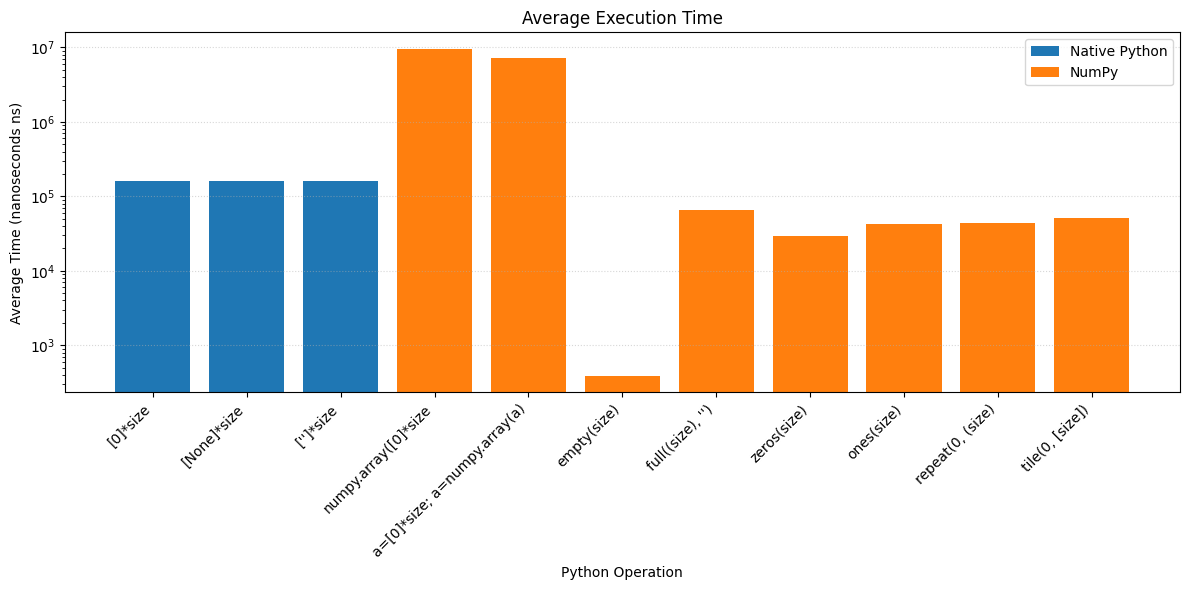

In [6]:
#@title Speedtesting: Initialization

import numpy
import matplotlib.pyplot as ploti

size = 100000 # Increase size for more reliable results

results_python = []
results_numpy = []

timing = %timeit -o a=[0]*size
results_python.append({"label": "[0]*size", "average": timing.average * 1e9})

timing = %timeit -o a=[None]*size
results_python.append({"label": "[None]*size", "average": timing.average * 1e9})

timing = %timeit -o a=['']*size
results_python.append({"label": "['']*size", "average": timing.average * 1e9})

timing = %timeit -o numpy.array([0]*size)
results_numpy.append({"label": "numpy.array([0]*size", "average": timing.average * 1e9})

timing = %timeit -o a=[0]*size; a=numpy.array(a)
results_numpy.append({"label": "a=[0]*size; a=numpy.array(a)", "average": timing.average * 1e9})

timing = %timeit -o a=numpy.empty(size)
results_numpy.append({"label": "empty(size)", "average": timing.average * 1e9})

timing = %timeit -o a=numpy.full((size), 0)
results_numpy.append({"label": "full((size), '')", "average": timing.average * 1e9})

timing = %timeit -o a=numpy.full((size), '')
results_numpy.append({"label": "full((size), '')", "average": timing.average * 1e9})

timing = %timeit -o a=numpy.zeros(size)
results_numpy.append({"label": "zeros(size)", "average": timing.average * 1e9})

timing = %timeit -o a=numpy.ones(size)
results_numpy.append({"label": "ones(size)", "average": timing.average * 1e9})

timing = %timeit -o a=numpy.repeat(0, (size))
results_numpy.append({"label": "repeat(0, (size)", "average": timing.average * 1e9})

timing = %timeit -o a=numpy.tile(0, [size])
results_numpy.append({"label": "tile(0, [size])", "average": timing.average * 1e9})

# Extract labels and average times from the results list
labels_python = [res["label"] for res in results_python]
average_python = [res["average"] for res in results_python]
labels_numpy = [res["label"] for res in results_numpy]
average_numpy = [res["average"] for res in results_numpy]

print()

# Plot bar graph
ploti.figure(figsize=(12, 6))
ploti.grid(axis="y", linestyle=":", alpha=0.5)
ploti.bar(labels_python, average_python, label="Native Python")
ploti.bar(labels_numpy, average_numpy, label="NumPy")
ploti.xlabel("Python Operation")
ploti.ylabel("Average Time (nanoseconds ns)")
ploti.title("Average Execution Time")
ploti.legend()
ploti.xticks(rotation=45, ha='right')
ploti.yscale('log')
ploti.tight_layout()
ploti.show()

1.18 ms ± 485 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
531 µs ± 199 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
110 µs ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
55.6 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
30.7 µs ± 592 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
61.2 µs ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
31.4 µs ± 772 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
41.7 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
86.1 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
83.7 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
43.9 µs ± 3.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
54 µs ± 9.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)



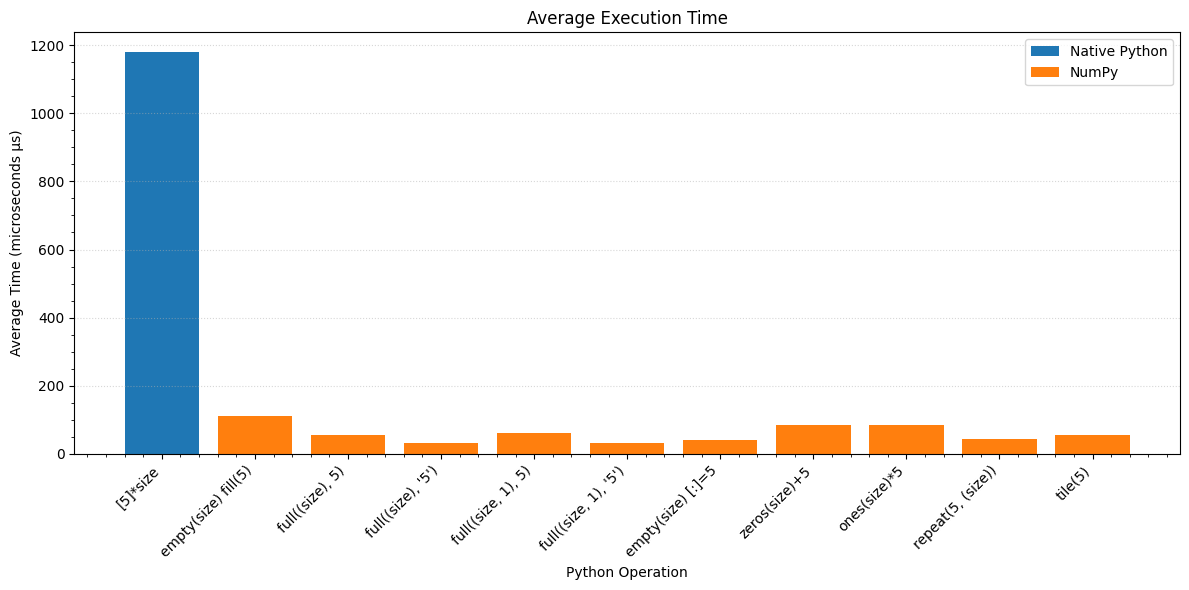

In [7]:
#@title Speedtesting: Valued Initialization
# This test is not for empty sets.

import numpy
import matplotlib.pyplot as ploti

size = 100000 # Increase size for more reliable results

results_python = []
results_numpy = []

timing = %timeit -o a=[5]*size
results_python.append({"label": "[5]*size", "average": timing.average * 1e6})

timing = %timeit -o a=["5"]*size
results_python.append({"label": "[5]*size", "average": timing.average * 1e6})

timing = %timeit -o a=numpy.empty(size); a.fill(5)
results_numpy.append({"label": "empty(size) fill(5)", "average": timing.average * 1e6})

timing = %timeit -o a=numpy.full((size), 5)
results_numpy.append({"label": "full((size), 5)", "average": timing.average * 1e6})

timing = %timeit -o a=numpy.full((size), '5')
results_numpy.append({"label": "full((size), '5')", "average": timing.average * 1e6})

timing = %timeit -o a=numpy.full((size, 1), 5)
results_numpy.append({"label": "full((size, 1), 5)", "average": timing.average * 1e6})

timing = %timeit -o a=numpy.full((size, 1), '5')
results_numpy.append({"label": "full((size, 1), '5')", "average": timing.average * 1e6})

timing = %timeit -o a=numpy.empty(size); a[:]=5
results_numpy.append({"label": "empty(size) [:]=5", "average": timing.average * 1e6})

timing = %timeit -o a=numpy.zeros(size)+5
results_numpy.append({"label": "zeros(size)+5", "average": timing.average * 1e6})

timing = %timeit -o a=numpy.ones(size)*5
results_numpy.append({"label": "ones(size)*5", "average": timing.average * 1e6})

timing = %timeit -o a=numpy.repeat(5, (size))
results_numpy.append({"label": "repeat(5, (size))", "average": timing.average * 1e6})

timing = %timeit -o a=numpy.tile(5, [size])
results_numpy.append({"label": "tile(5)", "average": timing.average * 1e6})

# Extract labels and average times from the results list
labels_python = [res["label"] for res in results_python]
average_python = [res["average"] for res in results_python]
labels_numpy = [res["label"] for res in results_numpy]
average_numpy = [res["average"] for res in results_numpy]

print()

# Plot bar graph
ploti.figure(figsize=(12, 6))
ploti.grid(axis="y", linestyle=":", alpha=0.5)
ploti.bar(labels_python, average_python, label="Native Python")
ploti.bar(labels_numpy, average_numpy, label="NumPy")
ploti.xlabel("Python Operation")
ploti.ylabel("Average Time (microseconds µs)")
ploti.legend()
ploti.title("Average Execution Time")
ploti.xticks(rotation=45, ha='right')
ploti.minorticks_on()
ploti.tight_layout()
ploti.show()

In [ ]:
#@title Array (Re)shaping > NumPy

import numpy as np

vector1 = np.arange(5)

print("Here is a 1D array")
print(vector1)
print(vector1.shape)

# Row into column
print("\nNumPy has no 1D columns in NumPy, but there are ways to go around this shortcoming by turning 1D rows into 2D 'column'...")
print("Here are a few ways")
print("\n1. via vector1.reshape(-1,1)"), print(vector1.reshape(-1, 1)) #-1 lets Python decide how many rows/columns/layers/etc. It will fit as many as it can.
print(vector1.reshape(-1, 1).shape)

print("\n2. via vector1[:, None]"), print(vector1[:, None])
print(vector1[:, None].shape)

print("\n3. via vector1[:, np.newaxis:"), print(vector1[:, np.newaxis])
print(vector1[:, np.newaxis].shape)

# This is similar to transposing a (1D) row into a (2D) column.


Here is a 1D array
[0 1 2 3 4]
(5,)

NumPy has no 1D columns in NumPy, but there are ways to go around this shortcoming by turning 1D rows into 2D 'column'...
Here are a few ways

1. via vector1.reshape(-1,1)
[[0]
 [1]
 [2]
 [3]
 [4]]
(5, 1)

2. via vector1[:, None]
[[0]
 [1]
 [2]
 [3]
 [4]]
(5, 1)

3. via vector1[:, np.newaxis:
[[0]
 [1]
 [2]
 [3]
 [4]]
(5, 1)


In [ ]:
#@title Transposition > NumPy > Vectors

import numpy as np


print("\nIn NumPy, transposing a vector (1D array) results in the same vector.")
vector1 = np.array([ 1, 2, 3, 4, 5])
print("Untransposed vector:" , vector1)
print("Attempting to transpose via vector1.T:", np.transpose(vector1))
print("As we can see, it does not transpose a row vector into a column vector.")

print("\nThere are different ways to go around this.")

print("The simplest one is to create the vector, as a 2D array, instead of a 1D array:")
print("So, instead of:", vector1)
vector1 = np.array([ [1,2,3,4,5]]) # instead of vector1 = np.array ([1, 2, 3, 4])
print("Insert extra brackets:", vector1)

print("\nAfter giving it an extra dimension, it can be transposed:")
print("Transposing via vector1.T:"), print(vector1.T)
print("Transposing via np.transpose(vector1):"), print(np.transpose(vector1))

vector1 = np.array([1,2,3,4,5]) # restore vector1

print("\nLets see what happens, if we transpose vector1, now.")
print("2D vector1:")
print(vector1)
print(vector1.shape)

print("\nvector1.T:")
print(vector1.T)
print(vector1.T.shape)

vector1 = np.array([1,2,3,4,5]) # restore vector1

matrix1 = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8]])
print("\nNow, lets take a look at a 2D array...")
print(matrix1)
print(matrix1.shape)
print("\nTrying this with on a 2D array, also turns it into a 3D array:")
print("matrix2[:, None]")
print(matrix1[:, None])
print(matrix1[:, None].shape)



In NumPy, transposing a vector (1D array) results in the same vector.
Untransposed vector: [1 2 3 4 5]
Attempting to transpose via vector1.T: [1 2 3 4 5]
As we can see, it does not transpose a row vector into a column vector.

There are different ways to go around this.
The simplest one is to create the vector, as a 2D array, instead of a 1D array:
So, instead of: [1 2 3 4 5]
Insert extra brackets: [[1 2 3 4 5]]

After giving it an extra dimension, it can be transposed:
Transposing via vector1.T:
[[1]
 [2]
 [3]
 [4]
 [5]]
Transposing via np.transpose(vector1):
[[1]
 [2]
 [3]
 [4]
 [5]]

Transposing via vector1.reshape(-1,1)
[[1]
 [2]
 [3]
 [4]
 [5]]
(5, 1)

Other ways to reshape vector1 into a column vector:
Transposing via vector1[:, None]
[[1]
 [2]
 [3]
 [4]
 [5]]
(5, 1)

Transposing via vector1[:, np.newaxis:
[[1]
 [2]
 [3]
 [4]
 [5]] (5, 1)
However, this transforms the 1D (1-dimensional) array into a 2D array, as well:

Also, repeating vector1[:2, None] twice does not transpose it

In [ ]:
#@title Transposition > NumPy > Matrices, Tensors...

print("\nIn NumPy, we can transpose matrices and tensors. For example, matrix2 can be transposed, using matrix2.T or numpy.transpose(matrix2)")

#matrix2 = matrix2.T
print("\nHere is matrix2 transposed (matrix2.T):")
print(matrix2.T)

#matrix2 = matrix2.T.T
print("\nHere is matrix2 transposed back (matrix2.T.T):")
print(matrix2.T.T)

# matrix2 = np.transpose(matrix2)
print("\nHere is matrix2 transposed with np.transpose(matrix2):")
print(np.transpose(matrix2))

# Transposing tensors
print("\nHere is tensor2 transposed (tensor2.T):")
print(tensor2.T)
print(tensor2.T.shape)



In NumPy, we can transpose matrices and tensors. For example, matrix2 can be transposed, using matrix2.T or numpy.transpose(matrix2)

Here is matrix2 transposed (matrix2.T):
[[1 5]
 [2 6]
 [3 7]
 [4 8]]

Here is matrix2 transposed back (matrix2.T.T):
[[1 2 3 4]
 [5 6 7 8]]

Here is matrix2 transposed with np.transpose(matrix2):
[[1 5]
 [2 6]
 [3 7]
 [4 8]]

Here is tensor2 transposed (tensor2.T):
[[[ 1  9]
  [ 5 13]]

 [[ 2 10]
  [ 6 14]]

 [[ 3 11]
  [ 7 15]]

 [[ 4 12]
  [ 8 16]]]
(4, 2, 2)


In [ ]:
#@title Tensors > PyTorch

import torch

print("In PyTorch, scalars, vectors and matrices can be created as tensors.")

scalar3 = torch.tensor([1])
print("\n1. scalar3:")
print(scalar3)
print(type(scalar3), scalar3.shape)

vector3 = torch.tensor([ 1,2,3,4 ])
print("\n2. vector3:")
print(vector3)
print(type(vector3), vector3.shape)

matrix3 = torch.tensor([
    [1,2,3,4],
    [5,6,7,8]])

print("\n3. matrix3:")
print(matrix3)
print(type(matrix3), matrix3.shape)

tensor3 = torch.tensor([
    [[1,2,3,4],
     [5,6,7,8]],

    [[9,10,11,12],
     [13,14,15,16]]])
print("\n4. tensor3:")
print(tensor3)
print(type(tensor3), tensor3.shape)


In PyTorch, scalars, vectors and matrices can be created as tensors.

1. scalar3:
tensor([1])
<class 'torch.Tensor'> torch.Size([1])

2. vector3:
tensor([1, 2, 3, 4])
<class 'torch.Tensor'> torch.Size([4])

3. matrix3:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
<class 'torch.Tensor'> torch.Size([2, 4])

4. tensor3:
tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[ 9, 10, 11, 12],
         [13, 14, 15, 16]]])
<class 'torch.Tensor'> torch.Size([2, 2, 4])


In [ ]:
#@title Transposition > Pytorch

print("\nTransposing 1D tensors doesn't really do anything...")
vector3 = torch.tensor([ 1,2,3,4 ])
print("Untransposed:",vector3)
print("Transposed",vector3.T)

#print(type(vector3.T), vector3.T.size())
print("\nFor this reason, we should create the vector as a 2D tensor from the start or reshape it, afterwards.")
print("So instead of this:")
print("vector3 = torch.tensor([ 1,2,3,4 ])", type(vector3), vector3.size())

print("We could type this:")
print("vector3 = torch.tensor([[ 1,2,3,4 ]])",type(vector3), vector3.size())
vector3 = torch.tensor([[ 1,2,3,4 ]]) # Instead of vector3 = torch.tensor([ 1,2,3,4 ])
print("Note the extra pair of brackets.")

print("\nNow, it can be transposed (vector3.T)")
print(vector3.T)
print(type(vector3.T), vector3.T.size())
vector3 = torch.tensor([ 1,2,3,4 ]) # reset vector3

print("\nAnother way, is to reshape it like this:")
print("vector3 = vector3.reshape(1,4)")
vector3 = vector3.reshape(1,4)
print(vector3)
print("Note the extra set of brackets.")

vector3 = torch.tensor([ 1,2,3,4 ]) # reset vector3

print("\n...or reshape it like this:")
print("vector3 = vector3.reshape(-1,4)")
vector3 = vector3.reshape(-1,4)
print(vector3)
print("Note the extra set of brackets.")
print("\nNow, it can be transposed (vector3.T)")
print(vector3.T)
#print("In this case, you could also reshape from a row vector straight into a column vector (vector3.reshape(4,1))")
#print(vector3.reshape(4,1))
#print("As you can see, it looks as if it had been transposed.")
#print("However, this is a different operation and wont work with matrices or tensors...")

print("\nUsing .reshape you can even revert it back into a 1D tensor (vector3.reshape(-1))")
vector3 = torch.tensor([[ 1,2,3,4 ]]) # Instead of vector3 = torch.tensor([ 1,2,3,4 ])
print(vector3.reshape(-1))
print(type(vector3.reshape(-1)), vector3.reshape(-1).size())

print("\nOn to algebraic matrices and tensors...")
print("\nHere is matrix3, a matrix or 2D tensor:")
print(matrix3)
print("\nLet's transpose it (matrix3.T)")
print(matrix3.T)
print(type(matrix3.T), matrix3.T.size())

print("\nHere is tensor3, a 3D tensor:")
print(tensor3)
print("\nNow, let's transpose it (tensor3.T)")
print(tensor3.T)
print(type(tensor3.T), tensor3.T.size())



Transposing 1D tensors doesn't really do anything...
Untransposed: tensor([1, 2, 3, 4])
Transposed tensor([1, 2, 3, 4])

For this reason, we should create the vector as a 2D tensor from the start or reshape it, afterwards.
So instead of this:
vector3 = torch.tensor([ 1,2,3,4 ]) <class 'torch.Tensor'> torch.Size([4])
We could type this:
vector3 = torch.tensor([[ 1,2,3,4 ]]) <class 'torch.Tensor'> torch.Size([4])
Note the extra pair of brackets.

Now, it can be transposed (vector3.T)
tensor([[1],
        [2],
        [3],
        [4]])
<class 'torch.Tensor'> torch.Size([4, 1])

Another way, is to reshape it like this:
vector3 = vector3.reshape(1,4)
tensor([[1, 2, 3, 4]])
Note the extra set of brackets.

...or reshape it like this:
vector3 = vector3.reshape(-1,4)
tensor([[1, 2, 3, 4]])
Note the extra set of brackets.

Now, it can be transposed (vector3.T)
tensor([[1],
        [2],
        [3],
        [4]])

Using .reshape you can even revert it back into a 1D tensor (vector3.reshape(-1)

##Softmax

In [ ]:
#@title Softmax Function > NumPy

import numpy as np

#Natural Exponent e = 2.718...

# Natural log and and Natural exponent cancel each other out

print("Here is our numeric list:")
list1 = [-2,-1,1,2] # NumPy softmax works with native Python lists and NumPy arrays
print(list1)

# NumPy calculation steps without using softmax function
print("\nHere is how to calculate the softmax in NumPy without using softmax()")
print("\nFirst, calculate the natural exponent for each element in the list (np.exp(var))")
expo = np.exp(list1)
print(expo)
print("\nThen, sum all thenentiated elements")
sum1 = sum(expo)
print(sum1)

print("\nAfterwards, divide the exponentiated elements with their exponentiated sum. The result is our softmax list")
softmaxed1 = expo / sum1
print(softmaxed1)

print("\nWe did it! Now, to verify, sum every softmaxed element in the list. The result should be 1")
print(f"Result: {sum(softmaxed1)}")



Here is our numeric list:
[-2, -1, 1, 2]

Here is how to calculate the softmax in NumPy without using softmax()

First, calculate the natural exponent for each element in the list (np.exp(var))
[0.13533528 0.36787944 2.71828183 7.3890561 ]

Then, sum all thenentiated elements
10.61055265179775

Afterwards, divide the exponentiated elements with their exponentiated sum. The result is our softmax list
[0.01275478 0.03467109 0.25618664 0.69638749]

We did it! Now, to verify, sum every softmaxed element in the list. The result should be 1
Result: 1.0


In [ ]:
#@title Softmax Function > PyTorch

import torch
import torch.nn as nn

#list2 = [1,2,3,4] #PyTorch can't softmax native Python lists nor NumPu arrays without converting them into tensors
list2 = torch.Tensor([-2,-1,1,2])

softfun = nn.Softmax(dim=0)


print("Here is our list")
print(list2)

print("\nHere is our softmaxed list")
#softmaxed2 = softfun(torch.Tensor(list2)) # Do this if needed to convert into a PyTorch tensor.
softmaxed2 = softfun(list2)
print(softmaxed2)



Here is our list
tensor([-2., -1.,  1.,  2.])

Here is our softmaxed list
tensor([0.0128, 0.0347, 0.2562, 0.6964])


##Slicing

In [ ]:
#@title Slicing > NumPy
import numpy as np

# leading zeroes dont work, but you can ident, somehow. wasn't identation important in py?
# square brackets are printed... To remove them, unpack with "*" or convert to string. reconvert if needed...
arry = np.array([
    [  1,  2,  3,  4],
     [ 5,  6,  7,  8],
      [9, 10, 11, 12]])

print("Hello! Meet arry. Arry is an array that looks like this:")
print(arry)
print(f"{type(arry)} <shape/dimenions: {arry.shape}>")
print("\nWe can slice arry, like a cake, using: variable[y1:y2, x1:x2, step].")
print("\nSlicing first 2 rows and columns > arry[0:2, 0:2]:")
print(arry[0:2, 0:2]) # slice and dice
print("\nSlicing last 2 rows and colums > arry[1:3, 2:4]:")
print(arry[1:3, 2:4]) # slice and dice


Hello! Meet arry. Arry is an array that looks like this:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
<class 'numpy.ndarray'> <shape/dimenions: (3, 4)>

We can slice arry, like a cake, using: variable[y1:y2, x1:x2, step].

Slicing first 2 rows and columns > arry[0:2, 0:2]:
[[1 2]
 [5 6]]

Slicing last 2 rows and colums > arry[1:3, 2:4]:
[[ 7  8]
 [11 12]]


##Variables

In [ ]:
#@title Multivariable/Multivalue Assignment > Python

#Python allows assigning multiple variables or values in a single line

#Here are a few examples:

# This won't work:
#var20,var21 = 1
#print(var20, var21)

var1 = var2 = 1
print("var1:", var1)
print("var2:", var2)
print()

var3,var4 = 3, 4
print("var3:", var3)
print("var4:", var4)
print()

var5=5;var6=6
print("var5:", var5)
print("var6:", var6)
print()

var7,var8,var9= [1, 2, 3] # It iterates through each value and assigns each value there to each variable. In this case, it's as if the brackets were not there.
print("var7:", var7)
print("var8:", var8)
print("var9:", var9)
print()

var9, var8 = [var7, var6] = var5, var4 = 50, 100
print(var9,var8,var7,var6,var5,var4)
print()

var10=var11 = 10,11
print("var10:", var10, type(var10))
print("var11:", var11, type(var11))
print()

var12=var12= [[[12], [13]]]
print("var10:", var10, type(var10))
print("var11:", var11, type(var11))
print()

var4 = [1, 2, 3, 4, 5]
var1, var2, var3 = var4[:3] # Sliced the first three elements
print(f"var1: {var1}. var2: {var2}. var3: {var3}.")
print(var5)
print()

var5, var6, var7 = var4[1], var4[2], [var4[var3]] # var 7 was an integer and became a list, getting the value based on its position. May need to convert var7...
print(f"var5: {var5} {type(var5)}. var6: {var6} {type(var5)}. var7: {var7} {type(var7)}.")
print()


var1: 1
var2: 1

var3: 3
var4: 4

var5: 5
var6: 6

var7: 1
var8: 2
var9: 3

50 100 50 100 50 100

var10: (10, 11) <class 'tuple'>
var11: (10, 11) <class 'tuple'>

var10: (10, 11) <class 'tuple'>
var11: (10, 11) <class 'tuple'>

var1: 1. var2: 2. var3: 3.
50

var5: 2 <class 'int'>. var6: 3 <class 'int'>. var7: [4] <class 'list'>.



#Visualisations

In [ ]:
#@title LaTeX Characters > Jupyter

from IPython.display import display # Jupyter/IPython Notebook library to display LaTeX characters. display()

fx = 2*x**2
gx = 4*x**3 - 3*x**4

print("f(x)")
print(fx) # fx unformatted
display(fx)# fx LaTeX
print()

print("g(x)")
print(gx) # fx unformatted
display(gx)# fx LaTeX


f(x)
2*x**2


2*x**2


g(x)
-3*x**4 + 4*x**3


-3*x**4 + 4*x**3

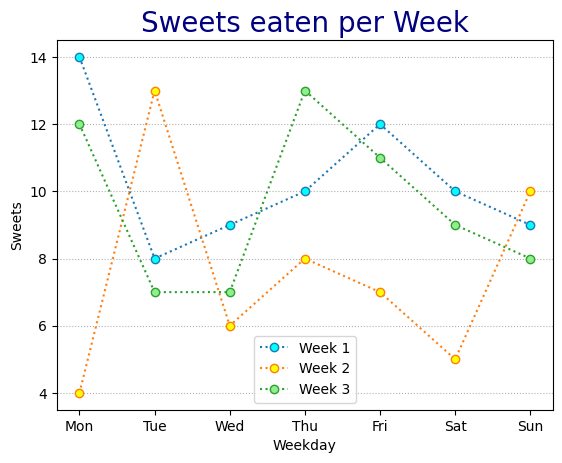

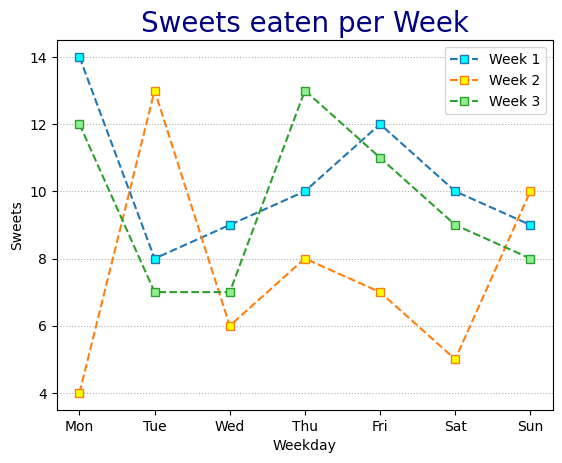

In [ ]:
#@title Visualisations > Matplotlib.pyplot

#import matplotlib as plt # this wont work
import matplotlib.pyplot as ploti

#print(matplotlib.__version__) outputs version


#x = [1, 2, 3, 4, 5, 6, 7]
x = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
y1 = [14,8,9,10,12,10,9]
y2 = [4,13,6,8,7,5,10]
y3 = [12,7,7,13,11,9,8]

# Different ways of implementing styles 1/2: Style Sheets
ploti.rc('lines', marker="o", linestyle=':') # multiple parameters per line
#ploti.rcParams["lines.linestyle"] = ":" # one parameter per line
#ploti.rcParams["lines.marker"] = "o" # one parameter per lin

#fig1 = ploti.figure(figsize=(10,4)) # make the figure larger...
ploti.title("Sweets eaten per Week", color="navy", fontsize=20) # Title
ploti.grid(axis="y", linestyle=":") # plot a grid
ploti.xlabel("Weekday") # X-axis label
ploti.ylabel("Sweets") # Y-axis label
ploti.plot(x,y1, markerfacecolor="cyan", label="Week 1")
ploti.plot(x,y2, markerfacecolor="yellow", label="Week 2")
ploti.plot(x,y3, markerfacecolor="lightgreen", label="Week 3")
ploti.legend(loc="lower center") # You can reposition the legenda
ploti.xticks(x) # Plot assigned x ticks, instead of auto-generated ticks.
ploti.show()


# Different ways of implementing styles 2/2: Dictionaries
# Creating and Unpacking Dictionaries
graphlinestyle1 = dict(marker = "s", linestyle = "--") # created dict

ploti.title("Sweets eaten per Week", color="navy", fontsize=20) # Title
ploti.grid(axis="y", linestyle=":") # plots background grid
ploti.xlabel("Weekday") # X-axis label
ploti.ylabel("Sweets") # Y-axis label
ploti.plot(x,y1, markerfacecolor="cyan", **graphlinestyle1) # unpacked dict
ploti.plot(x,y2, markerfacecolor="yellow", **graphlinestyle1) # unpacked dic
ploti.plot(x,y3, markerfacecolor="lightgreen", **graphlinestyle1) # unpacked dic
ploti.legend(["Week 1", "Week 2", "Week 3"])
ploti.xticks([0,1,2,3,4,5,6], labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ploti.show()
